<a href="https://colab.research.google.com/github/Glaudemias/BOOTCAMP---Data_Science---Alura/blob/main/Notebook/Bootcamp_Datascience_MODULO_1_Aulas%26Desafios_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 1 - AQUISIÇÃO E LEITURA DE DADOS REAIS 

O presente notebook, contem análises  de dados públicos do SUS, referentes aos gastos por agendamento hospitalar.

Aqui está o link, para obtençaõ da [**base de dados**](https://github.com/leobmend/alurabootcamp-dsaplicado/blob/9c784d5c34ea180d70243f289586aa25764a3f13/dados/A182510189_28_143_208.csv) 



---


---

**1. Passo**

Baixar a bibilioteca pandas e fazer a leitura do dataset


In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/BOOTCAMP - ALURA/ARQUIVOS /A182510189_28_143_208.csv', sep=';', skiprows=3,skipfooter=12,thousands='.' ,decimal=',')
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Unidade da Federação     2008/Jan  ...     2021/Mar         Total
0          11 Rondônia   1388528.39  ...  11023309.47  9.964113e+08
1              12 Acre    902416.00  ...   4077045.92  4.500485e+08
2          13 Amazonas   4735529.42  ...  22032176.22  1.917248e+09
3           14 Roraima    657889.53  ...   3985530.08  3.288770e+08
4              15 Pará  18864744.11  ...  33276392.89  4.705309e+09

[5 rows x 161 columns]

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB


Mostrando os 5 ultimos valores do meu dataframe

In [ ]:
dados.tail()

Unidade da Federação     2008/Jan  ...      2021/Mar         Total
22   43 Rio Grande do Sul  30931325.46  ...  1.301552e+08  1.276439e+10
23  50 Mato Grosso do Sul   5377392.11  ...  2.516820e+07  2.324525e+09
24         51 Mato Grosso   4795299.01  ...  1.961103e+07  2.180120e+09
25               52 Goiás  15310637.29  ...  4.559269e+07  4.973574e+09
26    53 Distrito Federal   4745919.19  ...  3.183192e+07  2.592423e+09

[5 rows x 161 columns]

Mostrando as médias dos valores do dataframe

In [ ]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Dez    5.337776e+07
2021/Jan    5.607375e+07
2021/Fev    5.557823e+07
2021/Mar    6.250230e+07
Total       6.388213e+09
Length: 159, dtype: float64

Observando os resultados acima, é possiel perceber que os valores dos dados, estão em notação cientifica. Por exemplo:

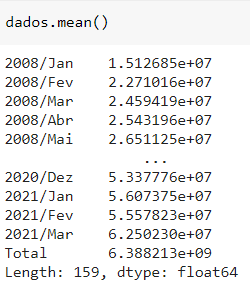

É preciso adequar a representação desses dados flutuantes, deixando-os o mais compreensivel, possivel

In [ ]:
pd.options.display.float_format ='{:.2f}'.format

In [ ]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

Agora os dados do tipo float, foram alterados para um formato americano mais adequado

Utilizou-se uma filtragem por mês no  dataframe, para visualizar as informações relacionadas ao mês de agosto do ano de 2008

In [ ]:
dados['2008/Ago']

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

Essa forma de impressão dos valores referentes do mês de agosto de 2008 é chamada de serie e não dataframe

Pegando a média dessa série

In [ ]:
dados['2008/Ago'].mean()

27800320.306666665



---


---

**2. Passo** 

Plotagem dos gráficos referente ao ano de 2008/Ago



Visualizando as informações em um gráfico:

* Esse gráfico será de acordo com o mês de agosto em relação a cada UF(Unidade da Federação) 

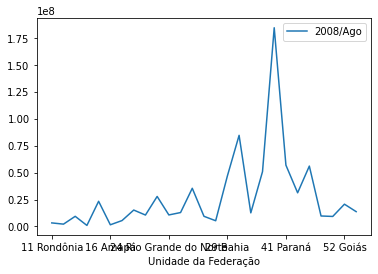

In [ ]:
dados.plot(x='Unidade da Federação', y='2008/Ago')

A visualização acima contem alguns equivócos, que comprometem a compreensão do observador, são eles:

*  A legenda (labels) estão ilegiveis

* O tipo de gráfico não é o mais adequado para uma leitura entre estados. O mais ideal seria o de Barras 

* O tamanho do gráfico compromete a legibilidade das informações



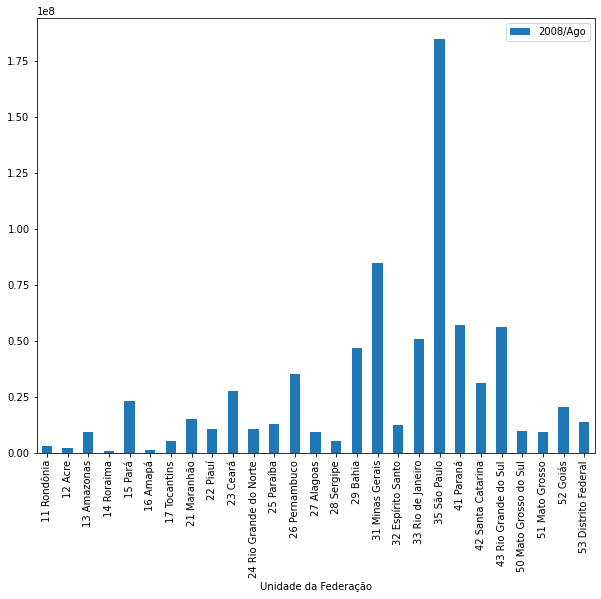

In [ ]:
dados.plot(x='Unidade da Federação', y='2008/Ago',kind='bar',figsize=(10,8))

Um outro erro entre os dois gráficos é a escala. A escala dos números estão `1,75 * le8 `(10 elevado a oitava)... esse tipo de representação não é didatico, afinal uma conta teria que ser realizada para entender o número por trás dessa grandeza

***A visualização dos dados deve ser a mais legivel possível !!***

O pandas por si só não consegue fazer a adequação e alteração de valores. Uma explicação para facilitar a compreensão: 
A bibilioteca pandas utiliza meio que "por baixo dos panos" métodos de uma outra biblioteca, que será importarda para adequar ainda mais a visualização, o `matplotlib.pyplot `. Utilizada para plotar gráficos e auxiliar na visualização dos dados de nosso dataframe

In [ ]:
import matplotlib.pyplot as plt


Um curiosidade desse gráfico, os eixos de valores que formam o mapa (x,y) são chamados de axis (ax)

`o ax seria o controle dos eixos`

Partindo dessa informação conseguimos então mudar o problema la de cima que tivemos com as labels encontradas no eixo y


In [ ]:
import matplotlib.ticker as ticker

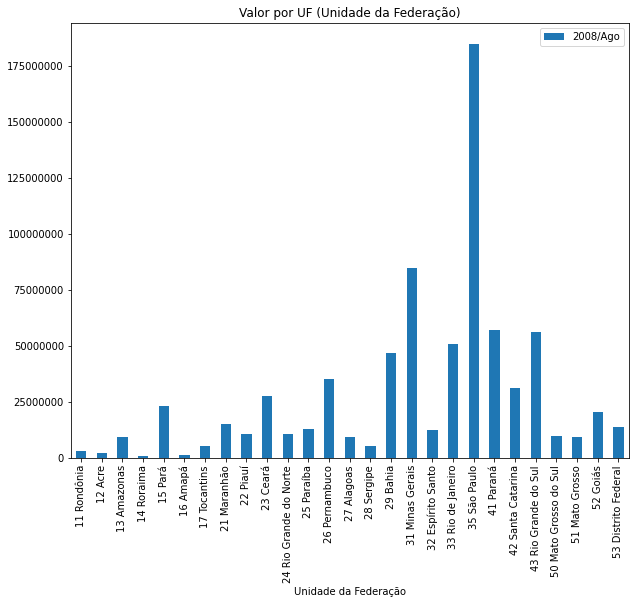

In [ ]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago',kind='bar',figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) #esse é o formatador antigo
plt.title('Valor por UF (Unidade da Federação)')
plt.show()

O método de formatação utilizado no gráfico acima foi o `ticker.FormatStrFormatter('%d')`. Como visto, ele consegue alterar a grandeza do eixo y.

Contudo, esse era o formatador antigo, para o resultado esperado é preciso usar um outro tipo, que é:

O `StrMethodFormatter`


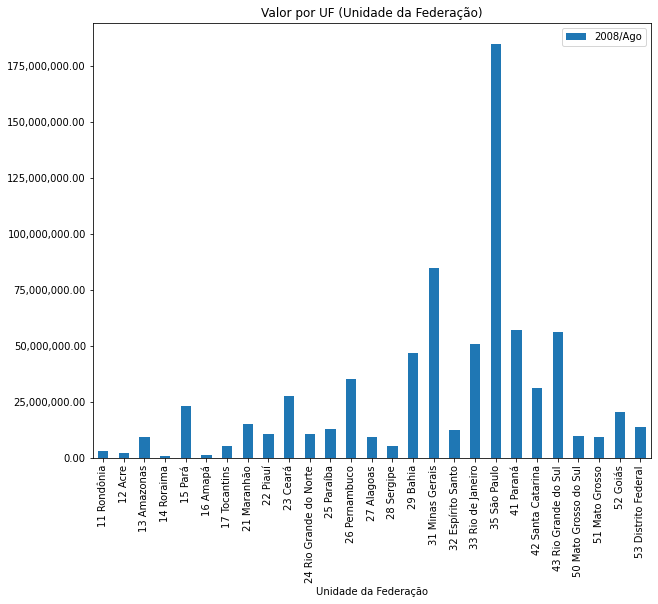

In [ ]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago',kind='bar',figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) #esse é o formatador novo
plt.title('Valor por UF (Unidade da Federação)')
plt.show()

Nessa aula, foi possivel aprender como:
 * Obter arquivos de repositorios onlines;
 * Abrir esses arquivos em ambientes colabs;
 * Fazer pequenas manipulações e visualizações em gráficos dos dados.

## **Aula 1 - Desafio 1**

O primeiro Desafio pede um titúlo mais descritivo sobre a visualização que estará sendo representada nos gráficos. Foi considerado como o ideal, um título que mais direto e especifico.

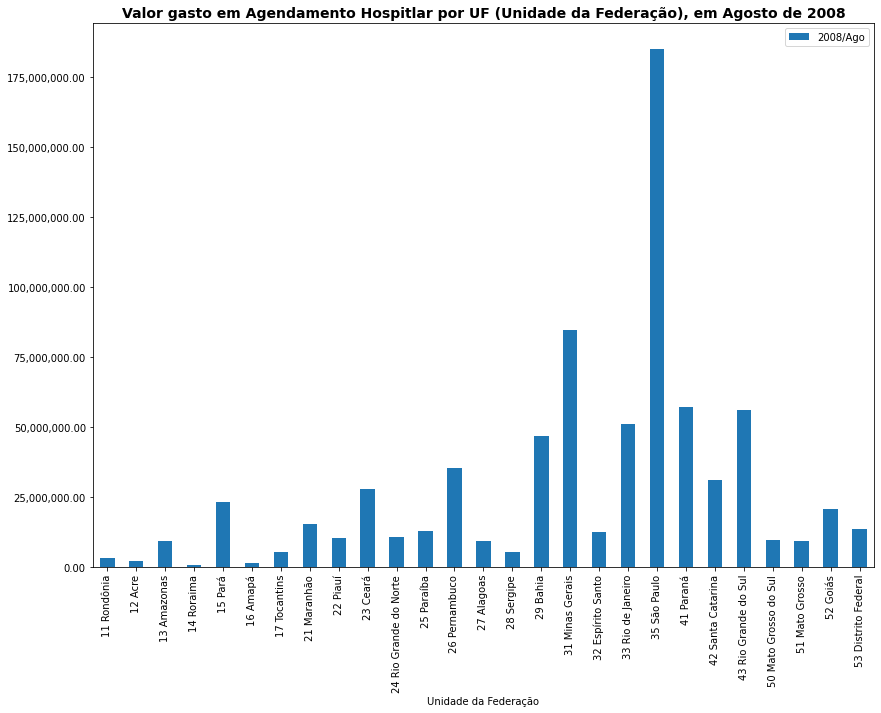

In [ ]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago',kind='bar',figsize=(14,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('Valor gasto em Agendamento Hospitlar por UF (Unidade da Federação), em Agosto de 2008'
, fontsize=14, fontweight='bold')
plt.show()

## **Aula 1 -Desafio 2**


O segundo exercicio, pede que a mesma análise realizada em 2008/Ago, seja feita utilziando o mês mais recente

---
---

**1. Passo**

Descobrir qual o mês mais recente, uma forma de fazer isso é usando os métodos `columns` e `tolist`: dessa forma será retornado o nome das colunas em uma lista, o mês mais recente é o ultimo valor dessa lista

In [ ]:
dados.columns.tolist()

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',


Uma outra forma é usando os métodos columns e unique(do pandas) `pd.unique(dados.columns)`

In [ ]:
pd.unique(dados.columns)

array(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar',
       '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago',
       '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan',
       '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai', '2009/Jun',
       '2009/Jul', '2009/Ago', '2009/Set', '2009/Out', '2009/Nov',
       '2009/Dez', '2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr',
       '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set',
       '2010/Out', '2010/Nov', '2010/Dez', '2011/Jan', '2011/Fev',
       '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul',
       '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez',
       '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai',
       '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out',
       '2012/Nov', '2012/Dez', '2013/Jan', '2013/Fev', '2013/Mar',
       '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago',
       '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/J

Dessa forma temos `2021/Mar ` como o mês mais recente

Agora vamos plotar esse gráfico

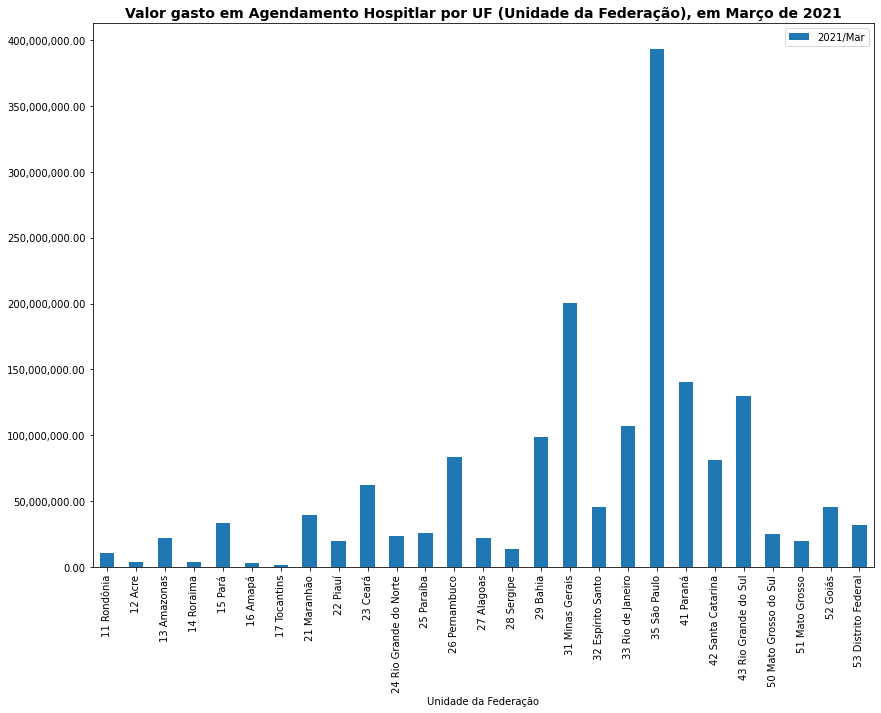

In [ ]:
ax = dados.plot(x='Unidade da Federação', y='2021/Mar',kind='bar',figsize=(14,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor gasto em Agendamento Hospitlar por UF (Unidade da Federação), em Março de 2021'
, fontsize=14, fontweight='bold')
plt.show()

# AULA 2 - PRIMEIRAS VISUALIZAÇÕES DE DADOS

Para essa aula foi utilizado um outro arquivo que,  continha os dados pela data de cada procedimento 

O link para esse [**dateset**](https://github.com/JuniorTorresMTJ/Bootcamp_Alura_2/blob/main/dados/A160324189_28_143_208.csv?raw=True)


---
---


Podemos então substituir o primeiro dataset por esse novo dataset na variável `dados` e executar tudo novamente, (como foi feito em aula, porém nessa análise resolvi criar uma nova variável) 

In [ ]:
dados_data= pd.read_csv('/content/drive/MyDrive/BOOTCAMP - ALURA/ARQUIVOS /A160324189_28_143_208.csv', sep=';',skiprows=3,skipfooter=12,thousands='.' ,decimal=',',encoding='ISO-8859-1')
dados_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Unidade da Federação 1992/Mar 1992/Abr  ...    2020/Jul     2020/Ago         Total
0          11 Rondônia        -        -  ...  7407388.24   3556381.57  929129659.72
1              12 Acre        -        -  ...  1163813.08            -  420668039.63
2          13 Amazonas        -        -  ... 13358514.02   4726485.73 1771654871.23
3           14 Roraima        -        -  ...  2739498.41   1524478.04  305010883.18
4              15 Pará        -        -  ... 27618727.51  11559714.54 4437115730.71

[5 rows x 280 columns]

Serão analisados dois meses:

* Ago/2008
* Set/2008

**1. Passo**

Para essa análise, é preciso criar um slice no dataframe. Este pode ser criado, usando a expressão `dados[{}]` como forma de selecionar as colunas respectivas ao mês

In [ ]:
#imprimindo os 5 valores desse dataframe
dados_data[{'2008/Ago','2008/Set'}].head()

2008/Set    2008/Ago
0  2843930.91  2938286.29
1  2084884.80  1886871.84
2  8148089.92  8331763.97
3  1003740.89  1045291.11
4 23667690.01 23259148.28


**2. Passo**

Esse novo dataframe `dados_data`, possui uma grande quantidade de linhas vazias. É importante que a analise seja feita somente com meses (linhas) que não tenham valore vazios 

In [ ]:
dados_data.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

Se for observado a média desse nosso novo dataframe, alguns meses(linhas) foram descartados. Esse indicativo revela que algumas datas não foram consideradas pelo pandas para a relalização do calcúlo da média. Portanto, o método `mean()`, pode ser usado como forma de descobrir quais meses não possuem valores faltantes 

In [ ]:
colunas_usaveis = dados_data.mean().index.tolist()
colunas_usaveis.insert(0,'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


**3. Passo**

Criar uma váriavel contendo apenas os meses utilizados para o calculo da média. Agora através dessa variável podemos filtrar o dataframe  => `dados_data[dados_usaveis]`

In [ ]:
usaveis = dados_data[colunas_usaveis]
usaveis.head()

Unidade da Federação  2007/Ago  ...    2020/Jul         Total
0          11 Rondônia   4209.37  ...  7407388.24  929129659.72
1              12 Acre  10470.07  ...  1163813.08  420668039.63
2          13 Amazonas  35752.72  ... 13358514.02 1771654871.23
3           14 Roraima   4785.91  ...  2739498.41  305010883.18
4              15 Pará 181159.29  ... 27618727.51 4437115730.71

[5 rows x 158 columns]

Indexando o Dataframe pela coluna Unidade da Federação

In [ ]:
usaveis=usaveis.set_index('Unidade da Federação')
usaveis.head()

2007/Ago  2007/Set  ...    2020/Jul         Total
Unidade da Federação                      ...                          
11 Rondônia            4209.37  16397.03  ...  7407388.24  929129659.72
12 Acre               10470.07  14001.71  ...  1163813.08  420668039.63
13 Amazonas           35752.72  45570.64  ... 13358514.02 1771654871.23
14 Roraima             4785.91  11858.63  ...  2739498.41  305010883.18
15 Pará              181159.29 433414.74  ... 27618727.51 4437115730.71

[5 rows x 157 columns]

**4. Passo**

Para plotar um gráfico onde as linhas serão relacionadas as UFs e não as datas, basta usar o método transposto, que transforma linhas de um data frame em colunas => `usaveis.T`

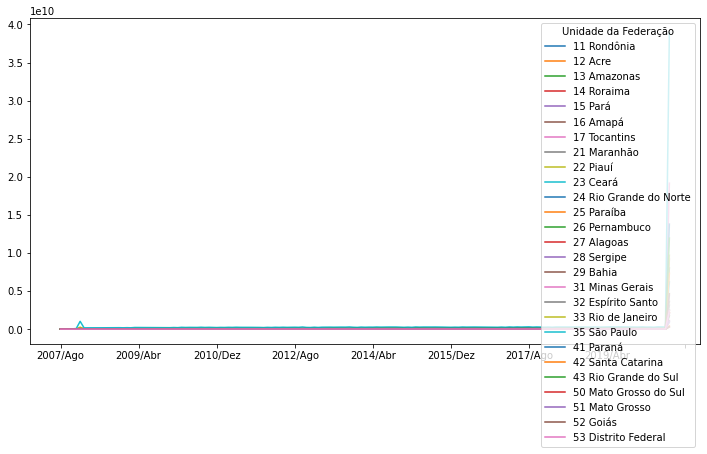

In [ ]:
usaveis.T.plot(figsize=(12,6))

Essa concentração no final do nosso gráfico, se dá pela presença da coluna total, que concentra sempre o maior número de valores em um dataframe.

Para essa análise ela não serve, portanto deve-se exclui-la (dropa-la) usando o método drop => `usaveis.drop('Total)`

In [ ]:
usaveis = usaveis.drop('Total', axis=1)
usaveis.head()

2007/Ago  2007/Set  ...    2020/Jun    2020/Jul
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ...  9193593.76  7407388.24
12 Acre               10470.07  14001.71  ...  2199920.70  1163813.08
13 Amazonas           35752.72  45570.64  ... 17509334.66 13358514.02
14 Roraima             4785.91  11858.63  ...  3216466.51  2739498.41
15 Pará              181159.29 433414.74  ... 35396030.78 27618727.51

[5 rows x 156 columns]

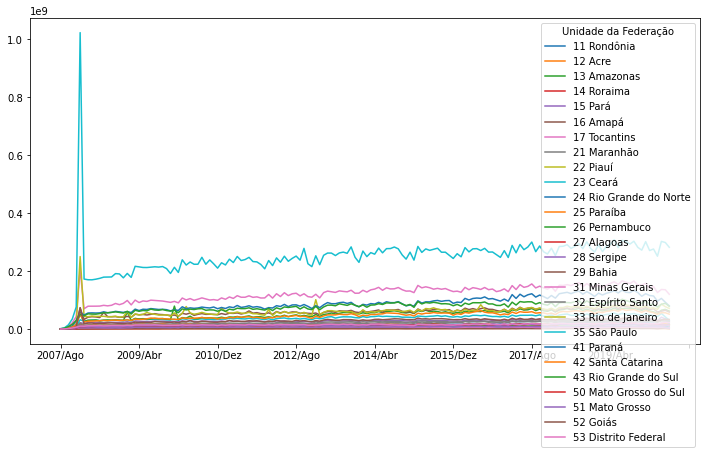

In [ ]:
usaveis.T.plot(figsize=(12,6))

Nessa aula, foi possivel aprender como:
 * Manipular Dados do data frame criando slicers;
 * Remoção de linhas vazias;
 * Filtragem de dados atráveis de variaveis criadas;
 * Tratamento de colunas para a plotagem das informações.

## **Aula 2 -Desafio 1**

O Primeiro Desafio pede uma edição e melhor posicionamento da legenda do nosso gráfico

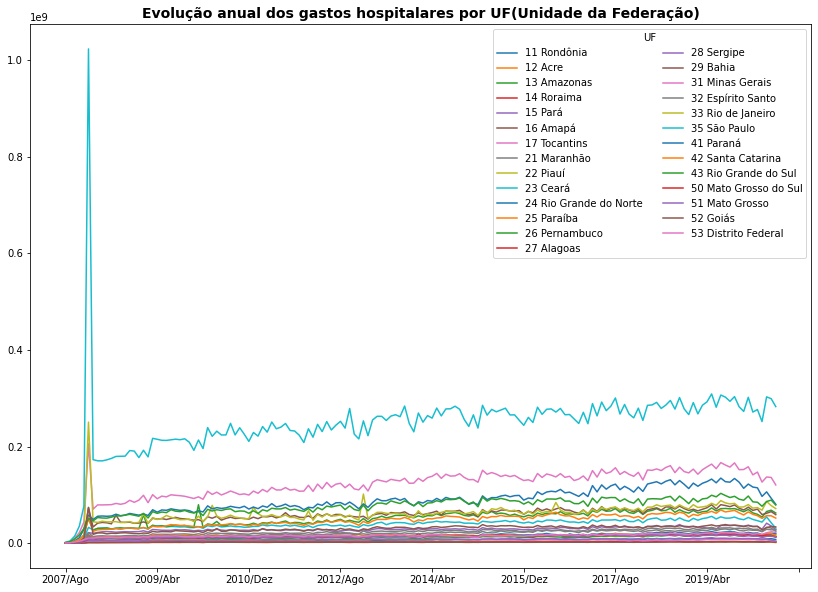

In [ ]:
axis = usaveis.T.plot(kind='line',figsize=(14,10))
plt.title('Evolução anual dos gastos hospitalares por UF(Unidade da Federação)', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'upper right',ncol=2, title = 'UF')
plt.show()

## **Aula 2 -Desafio 2**

Para a proximo desafio, foi feito uma analise comparativa entre UF's relacioandaos a região Nordeste e Sudeste. Foram utilizados os estados de maior média da região. 

**1. Passo**

Para começar, as médias de cado estado foram organizadas e colocadas em ordem decrescente

In [ ]:
usaveis.T.mean().sort_values(ascending=False)

Unidade da Federação
35 São Paulo             248583741.27
31 Minas Gerais          122449363.67
41 Paraná                 88110570.42
43 Rio Grande do Sul      76475519.83
33 Rio de Janeiro         61922679.53
29 Bahia                  58767523.66
26 Pernambuco             51366250.68
42 Santa Catarina         46839549.42
23 Ceará                  39633246.17
52 Goiás                  29724609.33
15 Pará                   28368830.00
21 Maranhão               23217212.22
32 Espírito Santo         20053546.15
24 Rio Grande do Norte    15828434.40
25 Paraíba                15781677.30
53 Distrito Federal       15498553.46
50 Mato Grosso do Sul     13898006.66
22 Piauí                  13606898.76
27 Alagoas                13448098.87
51 Mato Grosso            13017562.99
13 Amazonas               11326445.86
28 Sergipe                 7234521.30
17 Tocantins               6394277.19
11 Rondônia                5933158.17
12 Acre                    2696581.77
14 Roraima                 19

Os estados analisados serão 5, sendo 3 do nordeste e 2 do sudeste. 

Selecionando os maiores estados das regiões: **Ceará, Maranhão, São Paulo, Minas Gerais, Pernambuco**


**2. Passo**

O proximo passo é filtrar meu dataset com apenas essas unidades de federação

In [ ]:
uf_usada=usaveis.T.columns.tolist()
uf_usada

['11 Rondônia',
 '12 Acre',
 '13 Amazonas',
 '14 Roraima',
 '15 Pará',
 '16 Amapá',
 '17 Tocantins',
 '21 Maranhão',
 '22 Piauí',
 '23 Ceará',
 '24 Rio Grande do Norte',
 '25 Paraíba',
 '26 Pernambuco',
 '27 Alagoas',
 '28 Sergipe',
 '29 Bahia',
 '31 Minas Gerais',
 '32 Espírito Santo',
 '33 Rio de Janeiro',
 '35 São Paulo',
 '41 Paraná',
 '42 Santa Catarina',
 '43 Rio Grande do Sul',
 '50 Mato Grosso do Sul',
 '51 Mato Grosso',
 '52 Goiás',
 '53 Distrito Federal']

In [ ]:
uf_usada=usaveis.T

In [ ]:
uf_usada=uf_usada[{'23 Ceará','26 Pernambuco','35 São Paulo','21 Maranhão', '31 Minas Gerais'}]
uf_usada.head()

Unidade da Federação  26 Pernambuco  35 São Paulo  ...  21 Maranhão    23 Ceará
2007/Ago                  400640.85    1665349.90  ...    385330.18   357904.65
2007/Set                 1088340.42    4434168.64  ...   1018352.93   572356.18
2007/Out                 2973553.48   14577395.84  ...   2277717.78  1865065.71
2007/Nov                 6699828.82   35032259.98  ...   4334468.23  5131814.39
2007/Dez                16919031.39   76668547.41  ...   8832514.85 10798042.86

[5 rows x 5 columns]

**3. Passo**

Plotar o gráfico com os Estados escolhidos

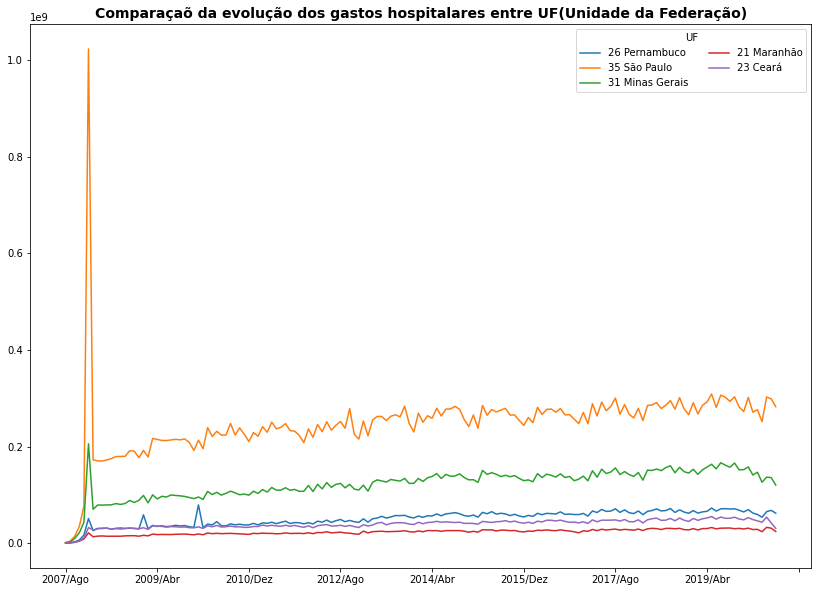

In [ ]:
axis = uf_usada.plot(kind='line',figsize=(14,10))
plt.title('Comparaçaõ da evolução dos gastos hospitalares entre UF(Unidade da Federação)', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'upper right',ncol=2, title = 'UF')
plt.show()


# AULA 3 - MANIPULAÇÃO DE DADOS

Continuando a analise a partir do que foi visto na aula anterior, ao observar o gráfico acima é possivel perceber a existência de um estranhamento entre os dados dos estados.

Um outro fator que compromete a visualização desse gráfico, é a quantidade de informação(estado) com cores iguais.

* O ideal é restringir os dados necessários, ou criar vários gráficos de analises (se de fato o próposito seja analisar 27 ESTADOS), de forma que  busque SEMPRE facilitar a visualização das informações



---




**A analise que agora será feita, é referente aos 5 estados que mais gastaram**



---
**1. Passo**

Selecionar os 5 primeiros estados

In [ ]:
#Aqui estamos falando de colunas
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
#Aqui estamos falando das 5 primeiras colunas
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

Uma outra forma de fazer esse procedimento sem transpor o data frame, é através do método `index`

In [ ]:
#Aqui estamos falando de linhas
usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
#Cinco primeiras linhas 
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

**2. Passo**

Plotando um gráfico dos cinco primeiros estados 

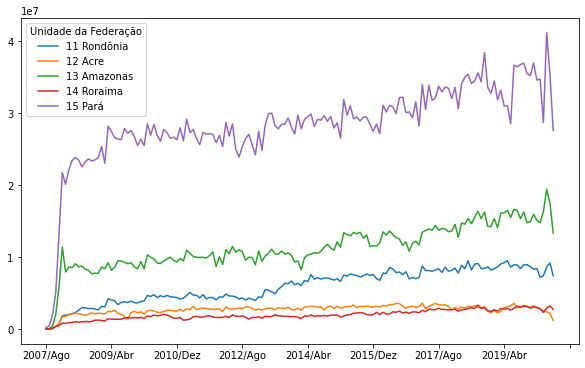

In [ ]:
usaveis[:5].T.plot(figsize=(10,6))

Observando o gráfico acima, é possível perceber que os cinco primeiros estados são referentes a região Norte do pais (isso foi sorte, ja que não existiu uma filtragem desses dados).

Esse gráfico permite a comparação da variação dos gastos hospitalares nos estados da Região.

**Plotando os estados de forma aleatória**

Para fazer essa filtragem, pode-se usar o método `sample `

* Vamos filtrar aqui 7 estados aleatórios

In [ ]:
usaveis.sample(n=7)

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                       ...                          
32 Espírito Santo     57408.11  284224.80  ...  27450865.16  27460475.47
22 Piauí             220788.25  353468.67  ...  15375523.59  18019214.49
14 Roraima             4785.91   11858.63  ...   3216466.51   2739498.41
15 Pará              181159.29  433414.74  ...  35396030.78  27618727.51
25 Paraíba            97352.78  368130.43  ...  19666096.87  15491469.06
33 Rio de Janeiro    469469.34  921646.57  ...  77604925.21  71540227.33
31 Minas Gerais      971394.37 2861781.50  ... 135977571.87 120467187.34

[7 rows x 156 columns]

A aleatoridade em alguns casos será necessária, principalmente quando se quer reproduzir algum estudo.


**3. Passo**


Para isso precisamos setar o `seed` da aleatorieadade, através da biblioteca `numpy` 

In [ ]:
import numpy as np
np.random.seed(687942) #teremos o mesmo resultado sempre, porque usamos uma mesma semente (seed)

usaveis.sample(n=7)

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                         ...                          
32 Espírito Santo       57408.11  284224.80  ...  27450865.16  27460475.47
31 Minas Gerais        971394.37 2861781.50  ... 135977571.87 120467187.34
24 Rio Grande do Norte 134605.36  272088.08  ...  20219961.81  19593057.45
17 Tocantins             4113.76   76633.06  ...   5018138.13   4489665.87
53 Distrito Federal    191951.47  769966.25  ...  23479773.03  22233542.26
50 Mato Grosso do Sul  199556.12  573675.41  ...  15838659.34  12508717.35
16 Amapá                33672.74  104822.98  ...   2699492.23   2155083.37

[7 rows x 156 columns]

**4. Passo**

Criando a coluna Total 

In [ ]:
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

2007/Ago  2007/Set  ...    2020/Jul         Total
Unidade da Federação                      ...                          
11 Rondônia            4209.37  16397.03  ...  7407388.24  925572673.82
12 Acre               10470.07  14001.71  ...  1163813.08  420666755.81
13 Amazonas           35752.72  45570.64  ... 13358514.02 1766925554.09
14 Roraima             4785.91  11858.63  ...  2739498.41  303485991.45
15 Pará              181159.29 433414.74  ... 27618727.51 4425537480.57

[5 rows x 157 columns]

Vamos ordenar nosso dataframe pela coluna `Total`, de forma crescente `(ascending=False)`

In [ ]:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total=ordenado_por_total.drop('Total',axis=1)
ordenado_por_total.head()

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                        ...                          
35 São Paulo         1665349.90 4434168.64  ... 299060851.62 282709570.31
31 Minas Gerais       971394.37 2861781.50  ... 135977571.87 120467187.34
41 Paraná             554800.22 1431708.01  ...  92901461.36  80320852.69
43 Rio Grande do Sul 1049252.33 3182913.14  ...  89019478.82  78929703.81
33 Rio de Janeiro     469469.34  921646.57  ...  77604925.21  71540227.33

[5 rows x 156 columns]

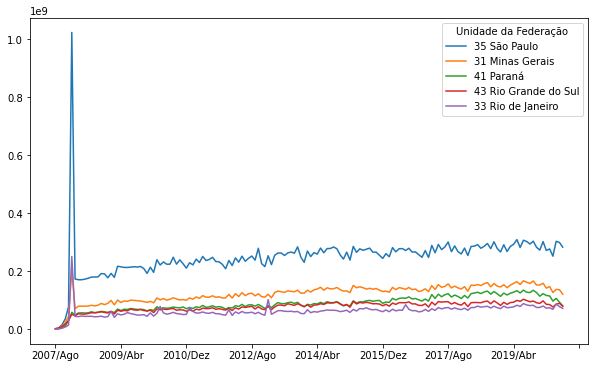

In [ ]:
ordenado_por_total.head().T.plot(figsize=(10,6))

O gráfico acima apresenta os cinco estados com maiores gastos


---



É importante perceber que esse ponto extremamente alto em São Paulo ele complica a visualização e é muito discrepante em relação aos demais dados dos outros locais e de São Paulo em outros anos:

* Uma forma de conferir esse valor alto, é atráves do método loc, chamar o index relativo a São Paulo e localizar o maior valor, e o ano em que isso ocorreu

In [ ]:
ordenado_por_total.loc['35 São Paulo'].sort_values(ascending=False)

2008/Jan   1023564534.21
2019/Mai    308925598.24
2019/Jul    306633987.91
2019/Out    303382527.10
2020/Mai    302857660.98
                ...     
2007/Dez     76668547.41
2007/Nov     35032259.98
2007/Out     14577395.84
2007/Set      4434168.64
2007/Ago      1665349.90
Name: 35 São Paulo, Length: 156, dtype: float64

Localizamos o maior valor em:

 `2008/Jan - 1023564534.21`



---

Essas "estranhesas" dentro da Analise dos dados requer também uma pesqusia externa, para de fato descartar ou comprovar as possibilidades desse dado estar errado.

Contudo esse banco de dados ele foi iniciado em  janeiro de 2008 e esses dados eles se referem tanto a data de atendimento como de processamento e embora a data de atendimento tenha ocorrido antes de Jan de 2008, só foi a partir dessa data que esse banco foi abastecido. 

Em outras palavras ocorreu um grande import de dados nesse mês e a falta de dados a respeito de casos ocorridos em datas anteriores, pode ter resultado na concentração desses dados em uma única data  



---



A solução mais viável é descartar essa data referente a  Jan/2008 e fazer a análise a partir da coluna 2008/Fev

E como fazer isso?


---


---



**5.Passo**

In [ ]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

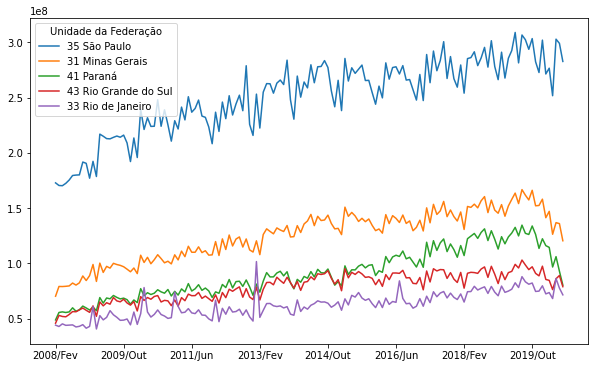

In [ ]:
ordenado_por_total.head().T.plot(figsize=(10,6))

Agora é possivel perceber que o comportamento das curvas, entre os estados se tornaram mais similares. 

Logo é possivel descartar a opção de em 2008 ter ocorrido uma crise sanitária no país 

As oscilações entre os dados, podem ser interpratados como as sazonalidades das épocas do ano, onde em um determinado período ocorrem um maior número de atendimentos em hospitais e em outra parte do ano esse número tende a cair

Nessa aula, foi possivel aprender como:
 * Manipular Dados do data frame;
 * Elaboração de analises mais filtradas, comprarando estados e regiões do Brasil;
 * Obtenção de um novo dataframe (referete aos casos de dengue *ver Desafios da aula*;
 * Criação de colunas no dataframe.

## **Aula 3 - Desafio 1**

O primeiro Desafio pede uma nova categorização do gráfico por cores. 

Para além disso, será utilizado um outro método com a seleção de cada cor, mas dessa vez aplicado a uma outra plotagem, referente aos cinco primeiros estados do dataframe, para melhor compreensão dos dados.

In [ ]:
usaveis_drop=usaveis.drop('Total',axis=1)

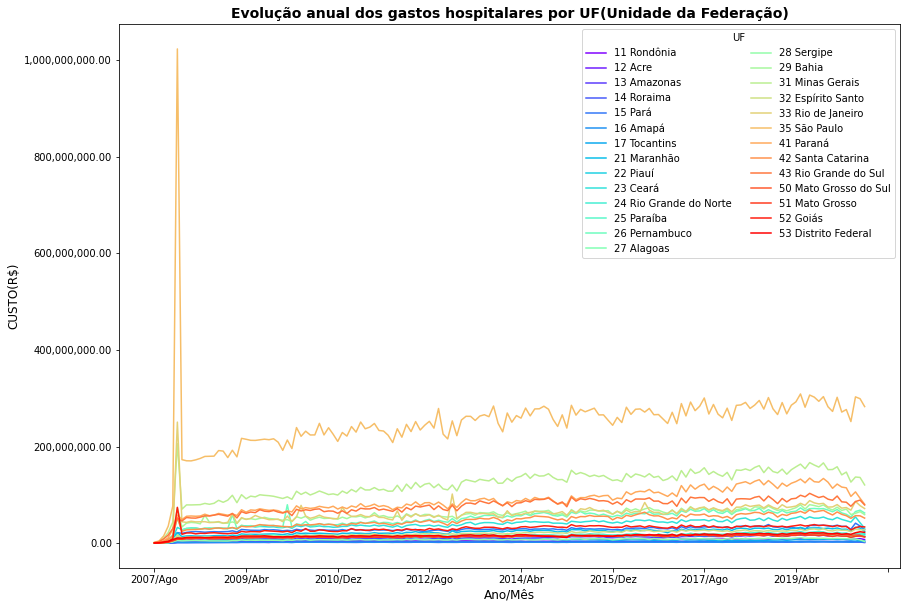

In [ ]:
axis= usaveis_drop.T.plot(figsize=(14,10), cmap= plt.get_cmap('rainbow'))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=12)
plt.xlabel('Ano/Mês', fontsize=12)
plt.title('Evolução anual dos gastos hospitalares por UF(Unidade da Federação)', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best',ncol=2, title = 'UF')

#mostrando o gráfico 
plt.show()

Plotando os cinco estados

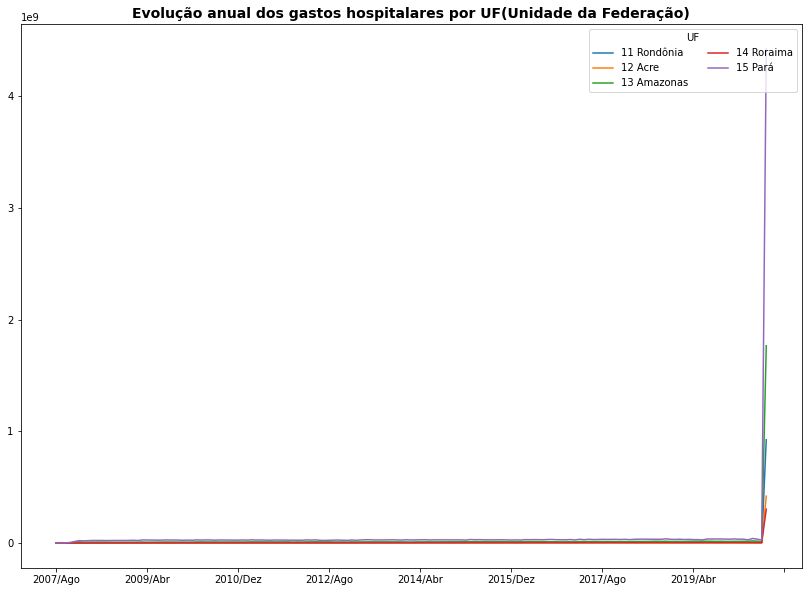

In [ ]:
axis = usaveis.head().T.plot(kind='line',figsize=(14,10))
plt.title('Evolução anual dos gastos hospitalares por UF(Unidade da Federação)', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'upper right',ncol=2, title = 'UF')
plt.show()

Mudando as cores

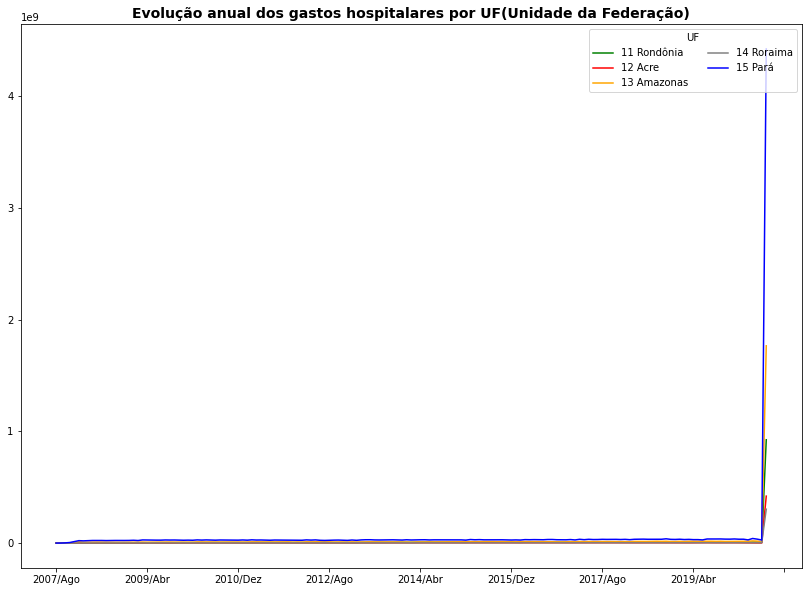

In [ ]:
axis = usaveis.head().T.plot(kind='line',figsize=(14,10), color=["green", "red", "orange", "gray", "blue"])
plt.title('Evolução anual dos gastos hospitalares por UF(Unidade da Federação)', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'upper right',ncol=2, title = 'UF')
plt.show()

## **Aula 3 - Desafio 2**

O Proximo desafio pede uma criação de colunas, que classifique cada estado de acordo com a  sua região.


---
**1. Passo**

Visualizando todos os estados (que no caso são as colunas do dataset, quando transposto)


In [ ]:
#Listando todos os estados
ordenado_por_total.T.columns.sort_values().tolist()

['11 Rondônia',
 '12 Acre',
 '13 Amazonas',
 '14 Roraima',
 '15 Pará',
 '16 Amapá',
 '17 Tocantins',
 '21 Maranhão',
 '22 Piauí',
 '23 Ceará',
 '24 Rio Grande do Norte',
 '25 Paraíba',
 '26 Pernambuco',
 '27 Alagoas',
 '28 Sergipe',
 '29 Bahia',
 '31 Minas Gerais',
 '32 Espírito Santo',
 '33 Rio de Janeiro',
 '35 São Paulo',
 '41 Paraná',
 '42 Santa Catarina',
 '43 Rio Grande do Sul',
 '50 Mato Grosso do Sul',
 '51 Mato Grosso',
 '52 Goiás',
 '53 Distrito Federal']

É possivel perceber uma codificação dos estados no dataset, sendo esta:

1 - Norte

2-  Nordeste

3 - Sudeste

4 - Sul

5 - Centro-Oeste

**2. Passo**

Criação de condições para a classificação dos estados e criação de coluna

In [ ]:
regioes = []

#Criando as condições
for estado in ordenado_por_total.T.columns.tolist():
  if estado[0] == '1':
    regioes.append('Norte')
  elif estado[0] == '2':
    regioes.append('Nordeste')
  elif estado[0] == '3':
    regioes.append('Sudeste')
  elif estado[0] == '4':
    regioes.append('Sul')
  elif estado[0] == '5':
    regioes.append('Centro-Oeste')

#Criando a coluna
ordenado_por_total['Região'] = regioes




In [ ]:
regioes

['Sudeste',
 'Sudeste',
 'Sul',
 'Sul',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Sul',
 'Nordeste',
 'Centro-Oeste',
 'Norte',
 'Nordeste',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Centro-Oeste',
 'Centro-Oeste',
 'Nordeste',
 'Nordeste',
 'Centro-Oeste',
 'Norte',
 'Nordeste',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte']

In [ ]:
ordenado_por_total['Região']

Unidade da Federação
35 São Paulo                   Sudeste
31 Minas Gerais                Sudeste
41 Paraná                          Sul
43 Rio Grande do Sul               Sul
33 Rio de Janeiro              Sudeste
29 Bahia                      Nordeste
26 Pernambuco                 Nordeste
42 Santa Catarina                  Sul
23 Ceará                      Nordeste
52 Goiás                  Centro-Oeste
15 Pará                          Norte
21 Maranhão                   Nordeste
32 Espírito Santo              Sudeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
53 Distrito Federal       Centro-Oeste
50 Mato Grosso do Sul     Centro-Oeste
22 Piauí                      Nordeste
27 Alagoas                    Nordeste
51 Mato Grosso            Centro-Oeste
13 Amazonas                      Norte
28 Sergipe                    Nordeste
17 Tocantins                     Norte
11 Rondônia                      Norte
12 Acre                          Norte
14 R

## **Aula 3 - Desafio 3**

O terceiro desafio nos pede que façamos uma formatação no gráfico com os cinco estados do dataframe que ja está ordenado pela coluna `Total`

**1. Passo** 

Retirar desse gráfico a coluna Região, ja que não contem valores númericos, portanto não será plotada.

Salvar a expressão sem a coluna Região em uma nova variavel

In [ ]:
ordenada_por_total_noReg=ordenado_por_total.columns[:-1].tolist()
ordenada_por_total_noReg

['2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',
 '2014/Mai',
 '2014/Jun',

**2. Passo**

Com a variável criada vamos passa-la com oreferência para o dataframa ordenada_por_total

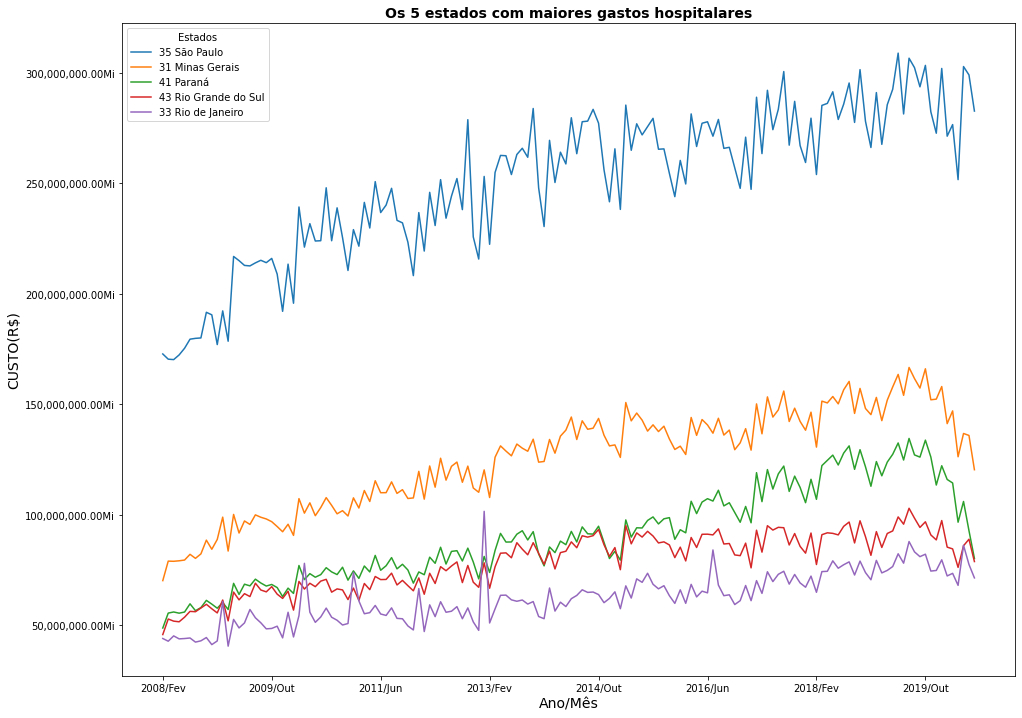

In [ ]:
ax= ordenado_por_total[ordenada_por_total_noReg].head().T.plot(figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Os 5 estados com maiores gastos hospitalares', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

## **Aula 3 - Desafio 4**

O Desafio 4, pede que o meu estado seja adicionado junto aos cinco esatdos plotados no desafio anterior. Meu estado é o Ceará.

**1.Passo**

Criar uma lista com todos os valores

In [ ]:
ordenado_por_total.index.to_list()

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '29 Bahia',
 '26 Pernambuco',
 '42 Santa Catarina',
 '23 Ceará',
 '52 Goiás',
 '15 Pará',
 '21 Maranhão',
 '32 Espírito Santo',
 '24 Rio Grande do Norte',
 '25 Paraíba',
 '53 Distrito Federal',
 '50 Mato Grosso do Sul',
 '22 Piauí',
 '27 Alagoas',
 '51 Mato Grosso',
 '13 Amazonas',
 '28 Sergipe',
 '17 Tocantins',
 '11 Rondônia',
 '12 Acre',
 '14 Roraima',
 '16 Amapá']

In [ ]:
Top5_Ceará = ordenado_por_total.head().index.to_list()
Top5_Ceará.append('23 Ceará')
Top5_Ceará

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '23 Ceará']

**2. Passo**

Plotar o gráfico com o método loc

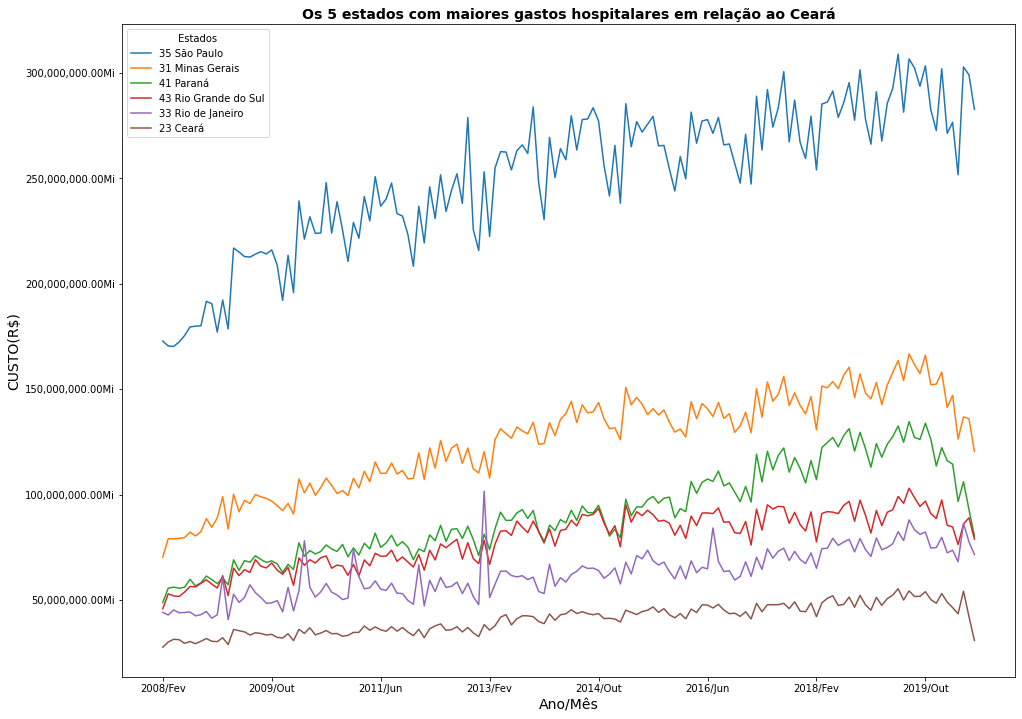

In [ ]:
ax= ordenado_por_total[ordenada_por_total_noReg].loc[Top5_Ceará].T.plot(figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Os 5 estados com maiores gastos hospitalares em relação ao Ceará', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

## **Aula 3 - Desafio 5**

O desafio 5, pede para avaliar o número de casos de dengue, o periodo de maior impacto da doença e se ele está ou não associado com periodos do verão e chuva.

Além disso podemos criar comparações entre as localidades

A Dengue ela segue no brasil uma sazonalidade que está associada as variações climáticas do pais, devido a trocas de estação do ano. A ocorrência de chuvas, aumento de temperatuda e umidade relativa do ar, favorecem ao aumento de criadouros do mosquito, uma vez que boa parte do seu ciclo de vida (o larval) necessita de tais condições [(IGNOTTI;VIANNA, 2013)*](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1415-790X2013000200240)

A análise em questão vai seguir conseiderando os Estados da região Sudeste e Nordeste e os cinco principais estados que mais gastaram com internações hospitalares e o estado do pesqusiador (no caso o Ceará):

Serão portanto feito 4 analises:

* Estados do Sudeste

* Estados do Nordeste

* Cinco principais estados

* Cinco principais estados + Ceará


Os dados sobre a dengue podem ser obtido pelo Tabnet, mas deixarei baixados no repositório do meu github, caso alguém queria fazer suas próprias análises

**1. Passo**

Ler o arquivo

In [ ]:
dados_dengue = pd.read_csv('/content/drive/MyDrive/BOOTCAMP - ALURA/ARQUIVOS /A181013189_28_143_208.csv',skiprows=4,skipfooter=12,sep=';',thousands='.' ,decimal=',',encoding='ISO-8859-1')
dados_dengue.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Unidade da Federação 2007/Jul 2007/Ago  ... 2021/Fev 2021/Mar  Total
0          11 Rondônia        -        -  ...       16        4  22386
1              12 Acre        -        -  ...       95       47   4793
2          13 Amazonas        -        -  ...       56       52   6490
3           14 Roraima        -        -  ...        -        -   4069
4              15 Pará        -        4  ...       30       22  50949

[5 rows x 167 columns]

**2. Passo**

Tratar os dados do dataframe:

* precisamos apenas das linhas que não estejam vazias

In [ ]:
dados_dengue.mean()

2008/Jan     209.67
2008/Fev     270.70
2008/Mar     538.85
2008/Abr     788.70
2008/Mai     454.70
             ...   
2019/Nov      47.44
2019/Dez      66.59
2020/Jan     177.07
2020/Mar     284.26
Total      26491.74
Length: 87, dtype: float64

In [ ]:
colunas_usaveis2 = dados_dengue.mean().index.tolist()
colunas_usaveis2.insert(0,'Unidade da Federação')
dados_dengue=dados_dengue[colunas_usaveis2]

 * Indexando o dataset pela coluna `Unidades da Federação`

In [ ]:
dados_dengue=dados_dengue.set_index('Unidade da Federação')
dados_dengue.head()

2008/Jan  2008/Fev  2008/Mar  ...  2020/Jan  2020/Mar  Total
Unidade da Federação                                ...                           
11 Rondônia                202       237       237  ...        91       117  22386
12 Acre                     15        13        12  ...        96        23   4793
13 Amazonas                175       246       248  ...        39        41   6490
14 Roraima                   7        13        32  ...        27         3   4069
15 Pará                   1382      1324      1274  ...       133       132  50949

[5 rows x 87 columns]

* Eliminando a coluna `Total`

In [ ]:
dados_dengue=dados_dengue.drop('Total', axis=1)

Como iremos fazer comparaçaõ entre os dois dataframes, optou-se por exluir a coluna referente ao mês de jan/2008, como forma de padronizar as análises

In [ ]:
#Excluindo 2008/Jan
dados_dengue=dados_dengue[dados_dengue.columns[1:]]


In [ ]:
dados_dengue.head()

2008/Fev  2008/Mar  ...  2020/Jan  2020/Mar
Unidade da Federação                      ...                    
11 Rondônia                237       237  ...        91       117
12 Acre                     13        12  ...        96        23
13 Amazonas                246       248  ...        39        41
14 Roraima                  13        32  ...        27         3
15 Pará                   1324      1274  ...       133       132

[5 rows x 85 columns]

* Para auxiliar nossas analises sobre os locais, cabe aqui criar a coluna respectiva a cada região dos estados. Dessa forma fica mais fácil a filtragem das informações

In [ ]:
regioes2 = []

#Criando as condições
for estado2 in dados_dengue.T.columns.tolist():
  if estado2[0] == '1':
    regioes2.append('Norte')
  elif estado2[0] == '2':
    regioes2.append('Nordeste')
  elif estado2[0] == '3':
    regioes2.append('Sudeste')
  elif estado2[0] == '4':
    regioes2.append('Sul')
  elif estado2[0] == '5':
    regioes2.append('Centro-Oeste')

#Criando a coluna
dados_dengue['Região'] = regioes2


In [ ]:
dados_dengue['Região']

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

**3. Passo**

Agora, a plotagem e análises dos gráficos

**Casos de Dengue da Região Sudeste**

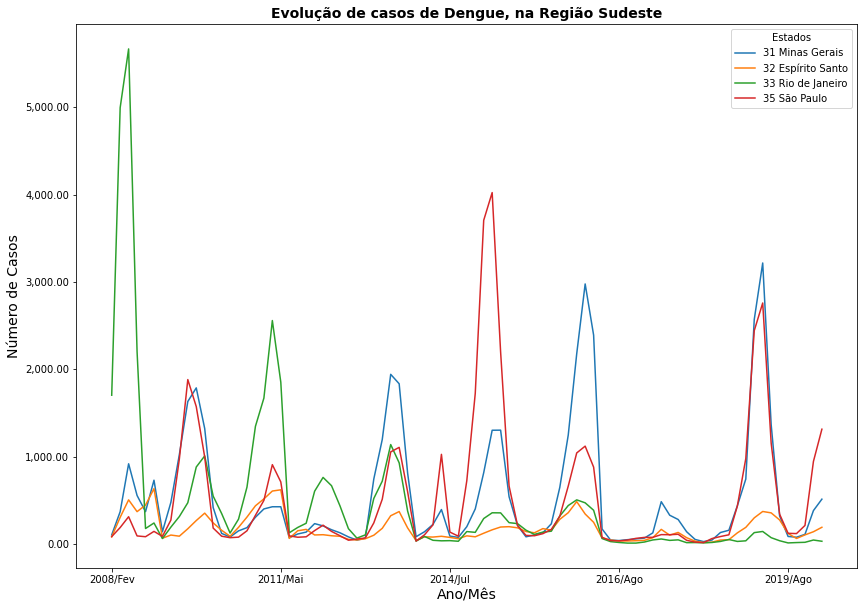

In [ ]:
ax=dados_dengue[dados_dengue.Região == 'Sudeste'].drop('Região',axis=1).T.plot(figsize=(14,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#criando titulos
plt.ylabel('Número de Casos', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Evolução de casos de Dengue, na Região Sudeste', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

Destaca-se nos estados da Região Sudeste São Paulo e Rio de Janeiro, com os maiores picos de casos de dengue, principalmente durante os meses de Abril e Maio e Julho periodo em que ocorre um aumento do número de chuvas em locais cujo o clima é o Tropical (como é o caso de boa parte do território do Sudeste)

**Casos de Dengue da Região Nordeste**

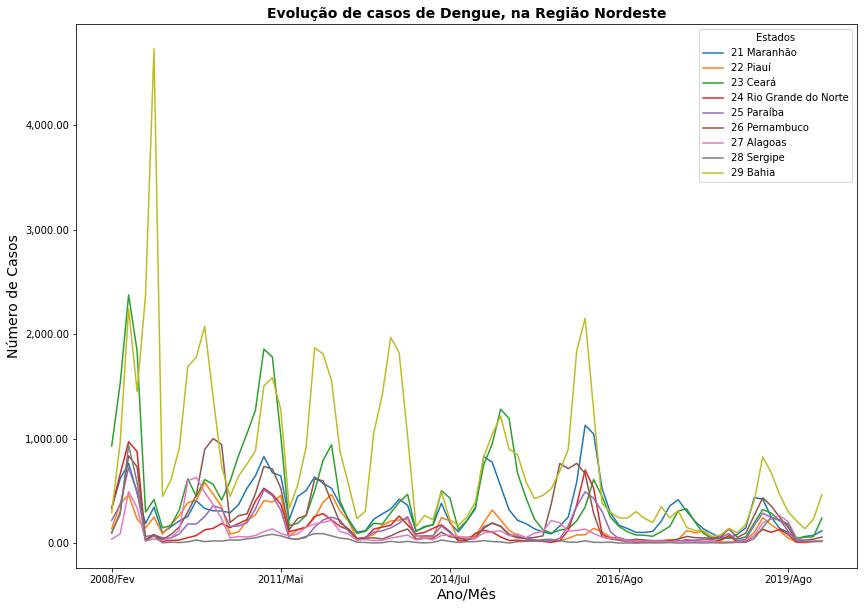

In [ ]:
ax = dados_dengue[dados_dengue.Região=='Nordeste'].drop('Região',axis=1).T.plot(figsize=(14,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#criando titulos
plt.ylabel('Número de Casos', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Evolução de casos de Dengue, na Região Nordeste', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

A respeito da Região Nordeste observa-se uma predominância dos números de casos na Bahia e no Ceará durante os meses iniciais do ano como Abril e Maio

Agora analisando os 5 estados com maiores internações Hospitalares 

**Top 5 Estados com maiores gastos Hospitalares**

In [ ]:
top5=ordenado_por_total[:5].T.columns
top5

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro'],
      dtype='object', name='Unidade da Federação')

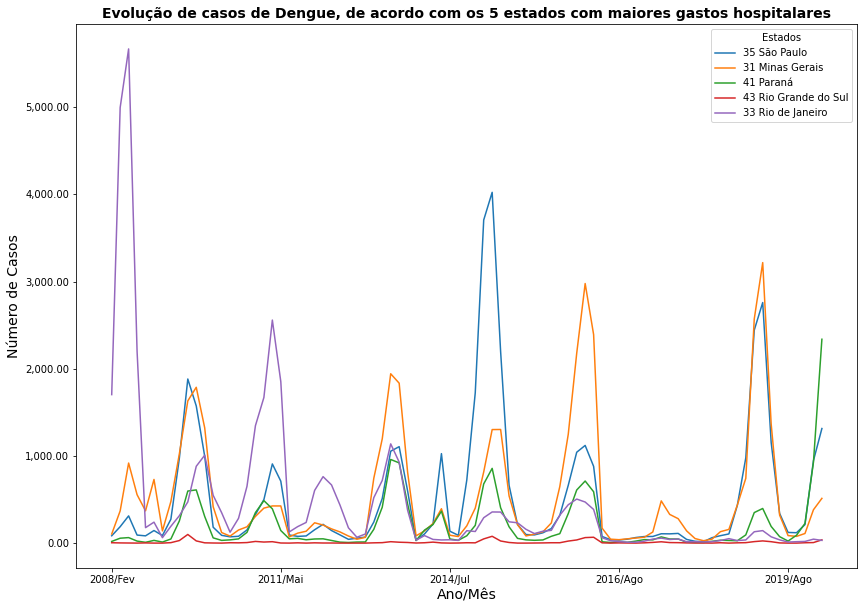

In [ ]:
ax=dados_dengue.loc[top5].drop('Região',axis=1).T.plot(figsize=(14,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#criando titulos
plt.ylabel('Número de Casos', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Evolução de casos de Dengue, de acordo com os 5 estados com maiores gastos hospitalares', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

A respeito dos 5 estados que mais tiveram gastos hospitalares, percebe-se uma predominância de São Paulo e Rio de Janeiro durante as datas de 2011/Abr

**Essas informações serão usadas em um gráfico de barras**

**Gráfico de Barras, números de casos de dengue e dos gastos hospitalares**

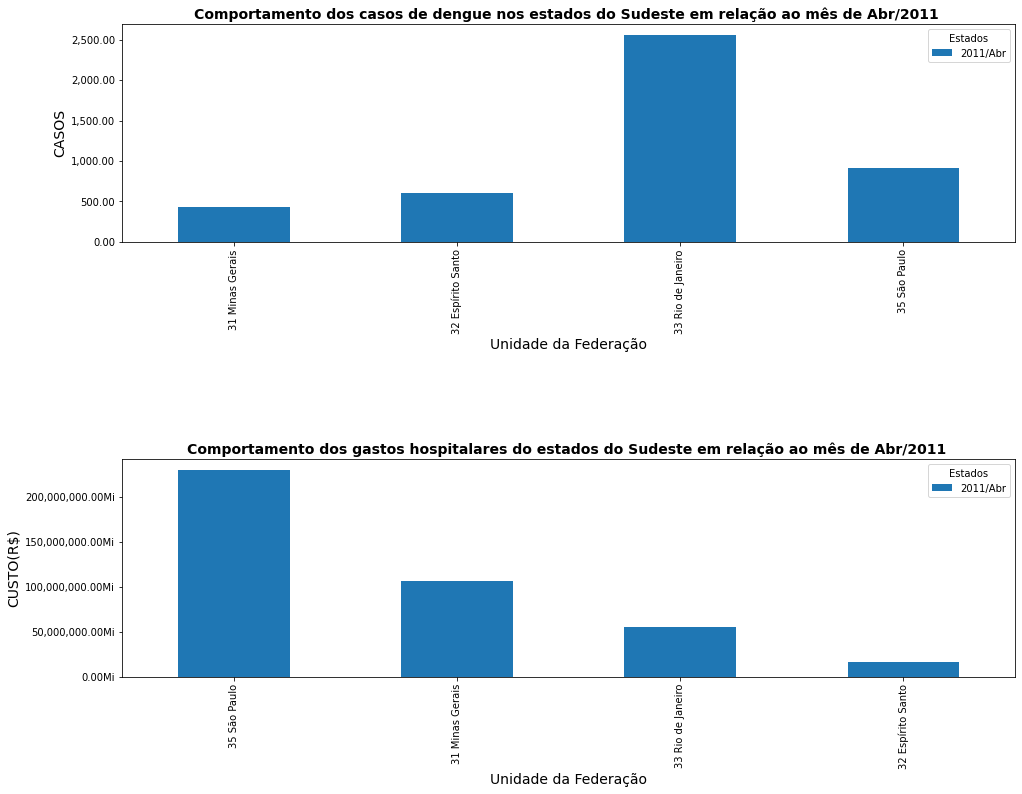

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,10))

dados_dengue[dados_dengue.Região =='Sudeste'].drop('Região',axis=1).plot( y='2011/Abr',kind='bar',figsize=(16,12), ax=ax1)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ordenado_por_total[ordenado_por_total.Região == 'Sudeste'].plot( y='2011/Abr',kind='bar',figsize=(16,12), ax=ax2)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos para o subplot 1 
ax1.set_ylabel('CASOS', fontsize=14)
ax1.set_xlabel('Unidade da Federação', fontsize=14)
ax1.set_title('Comportamento dos casos de dengue nos estados do Sudeste em relação ao mês de Abr/2011 ', fontsize = 14, fontweight = 'bold')
#legenda para o subplot 1
ax1.legend(loc = 'best', title = 'Estados', fontsize=10)

#criando titulos para o subplot  
ax2.set_ylabel('CUSTO(R$)', fontsize=14)
ax2.set_xlabel('Unidade da Federação', fontsize=14)
ax2.set_title('Comportamento dos gastos hospitalares do estados do Sudeste em relação ao mês de Abr/2011 ', fontsize = 14, fontweight = 'bold')

#legenda para o subplot 2
ax2.legend(loc = 'best', title = 'Estados', fontsize=10)


plt.subplots_adjust(hspace=1)
plt.show()

Não existe uma relação entre os casos de dengue em Abril de 2011 e o aumento de gastos hospitalares pelo estado do Rio de Janeiro

**Top 5 Estados com maiores gastos Hospitalares e o Ceará**

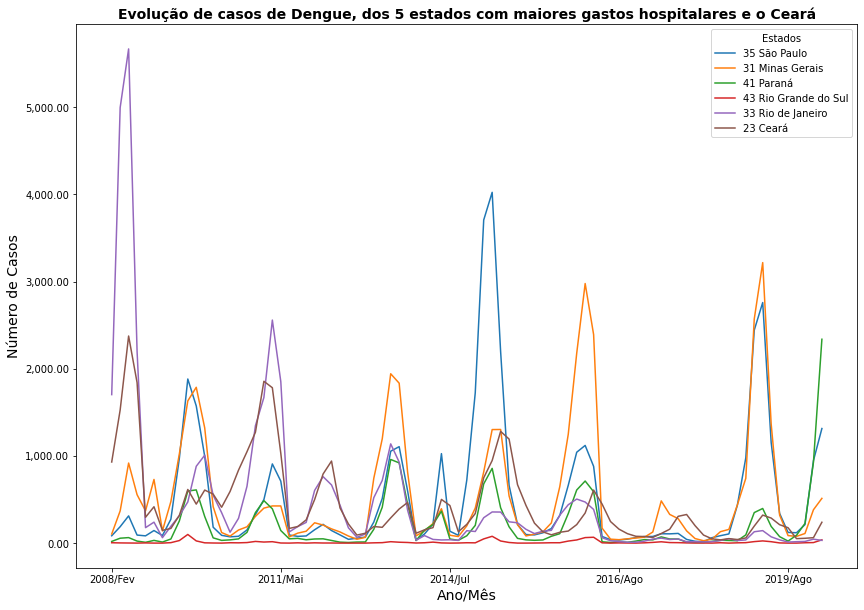

In [ ]:
ax = dados_dengue.loc[Top5_Ceará].drop('Região',axis=1).T.plot(figsize=(14,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#criando titulos
plt.ylabel('Número de Casos', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Evolução de casos de Dengue, dos 5 estados com maiores gastos hospitalares e o Ceará', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

Analisando agora junto ao Ceará observa-se que o número de casos do estado Nordestino em trechos do ano (principalmente nos meses iniciais, onde ocorre o aumento de chuva no estado) o numéro de casos são maiores que os de Minas Gerais e se aproximam dos de São Paulo, em **2011/Abr** 

**Visualizando essa data em um gráfico de Barras**


Disclaimer: *A partir dessa analise, eu comecei a usar variáveis que foram criadas apenas em desafios posteriores da aula 3*

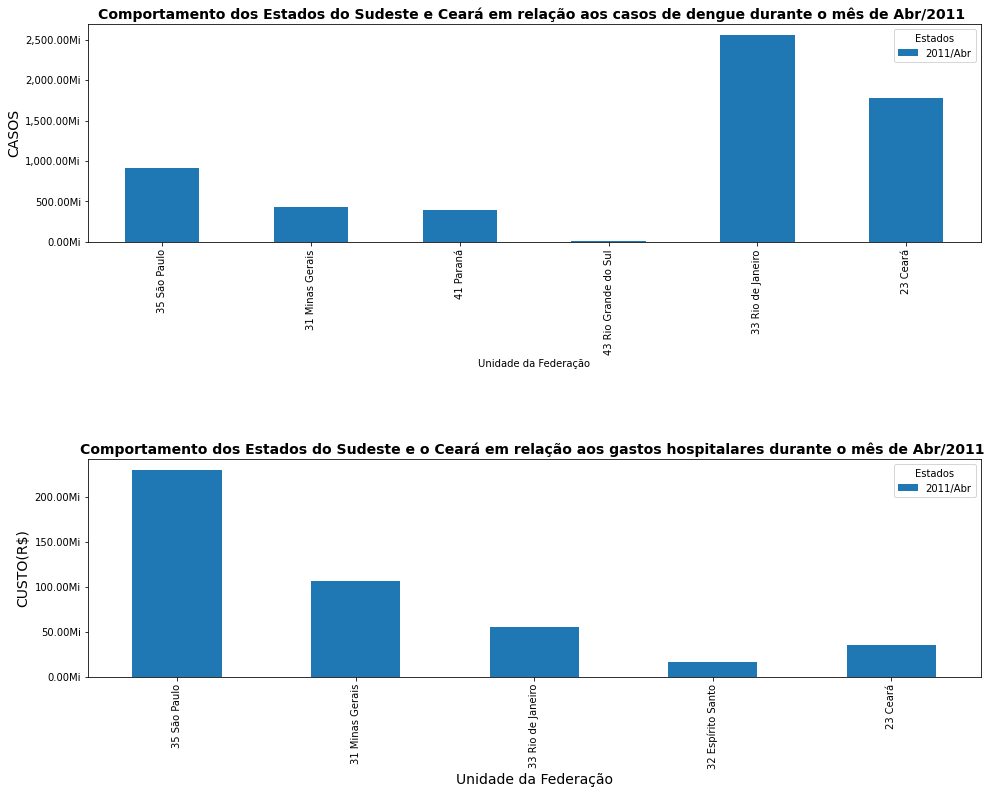

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,10))

dados_dengue.loc[Top5_Ceará].drop('Região',axis=1).plot( y='2011/Abr',kind='bar',figsize=(16,12), ax=ax1)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

ordenado_por_total[ordenada_por_total_noReg].loc[sudestelist_Ceará].plot( y='2011/Abr',kind='bar',figsize=(16,12), ax=ax2)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos para o subplot 1 
ax1.set_ylabel('CASOS', fontsize=14)
ax1.set_title('Comportamento dos Estados do Sudeste e Ceará em relação aos casos de dengue durante o mês de Abr/2011 ', fontsize = 14, fontweight = 'bold')
#legenda para o subplot 1
ax1.legend(loc = 'best', title = 'Estados', fontsize=10)

#criando titulos para o subplot  
ax2.set_ylabel('CUSTO(R$)', fontsize=14)
ax2.set_xlabel('Unidade da Federação', fontsize=14)
ax2.set_title('Comportamento dos Estados do Sudeste e o Ceará em relação aos gastos hospitalares durante o mês de Abr/2011 ', fontsize = 14, fontweight = 'bold')

#legenda para o subplot 2
ax2.legend(loc = 'best', title = 'Estados', fontsize=10)


plt.subplots_adjust(hspace=1)
plt.show()

Podemos observar que embora o Ceará tenha tido um aumento gigantesco de casos em 2011/Abr seus gastos hospitalres foram menores que os de Minas Gerais. Portanto a afirmação de *Quanto mais casos, maior o aumento de gastos* , não é uma obrigação

## **Aula 3 - Desafio 6**

O Desafio 6 pede a analise dos estados sudestinos em relação ao mês de Fev/2013

**1. Passo**

Criar uma filtragem com os dados da Região que seja `Região== Sudeste`

In [ ]:
sudeste = ordenado_por_total.query('Região =="Sudeste"')
sudeste = sudeste.drop('Região',axis=1)
sudeste.T

Unidade da Federação  35 São Paulo  ...  32 Espírito Santo
2008/Fev              172834914.73  ...        10032886.43
2008/Mar              170481849.56  ...        12262049.08
2008/Abr              170278285.95  ...        12453466.98
2008/Mai              172402180.59  ...        11789786.09
2008/Jun              175416595.83  ...        11889687.35
...                            ...  ...                ...
2020/Mar              276606288.92  ...        26555688.68
2020/Abr              251696362.66  ...        23735724.64
2020/Mai              302857660.98  ...        28614683.75
2020/Jun              299060851.62  ...        27450865.16
2020/Jul              282709570.31  ...        27460475.47

[150 rows x 4 columns]

**2. Passo**

Plotando o Gráfico

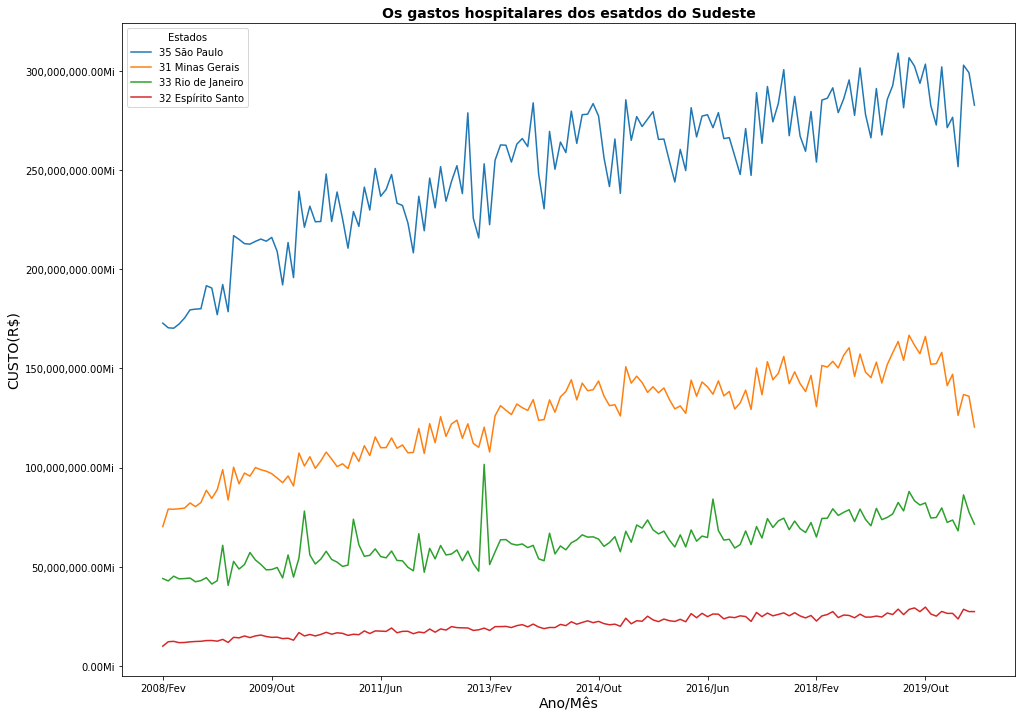

In [ ]:
ax= sudeste.T.plot(figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))
#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Os gastos hospitalares dos esatdos do Sudeste', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()

Pelo gráfico de linhas é possivel notar que todos os Estados tiveram um crescimento (aparentemente não proporcional, durante o mês de fevereiro/2013)



In [ ]:
sudeste

2008/Fev     2008/Mar  ...     2020/Jun     2020/Jul
Unidade da Federação                            ...                          
35 São Paulo         172834914.73 170481849.56  ... 299060851.62 282709570.31
31 Minas Gerais       70301089.50  79119005.51  ... 135977571.87 120467187.34
33 Rio de Janeiro     44122593.19  42892665.52  ...  77604925.21  71540227.33
32 Espírito Santo     10032886.43  12262049.08  ...  27450865.16  27460475.47

[4 rows x 150 columns]

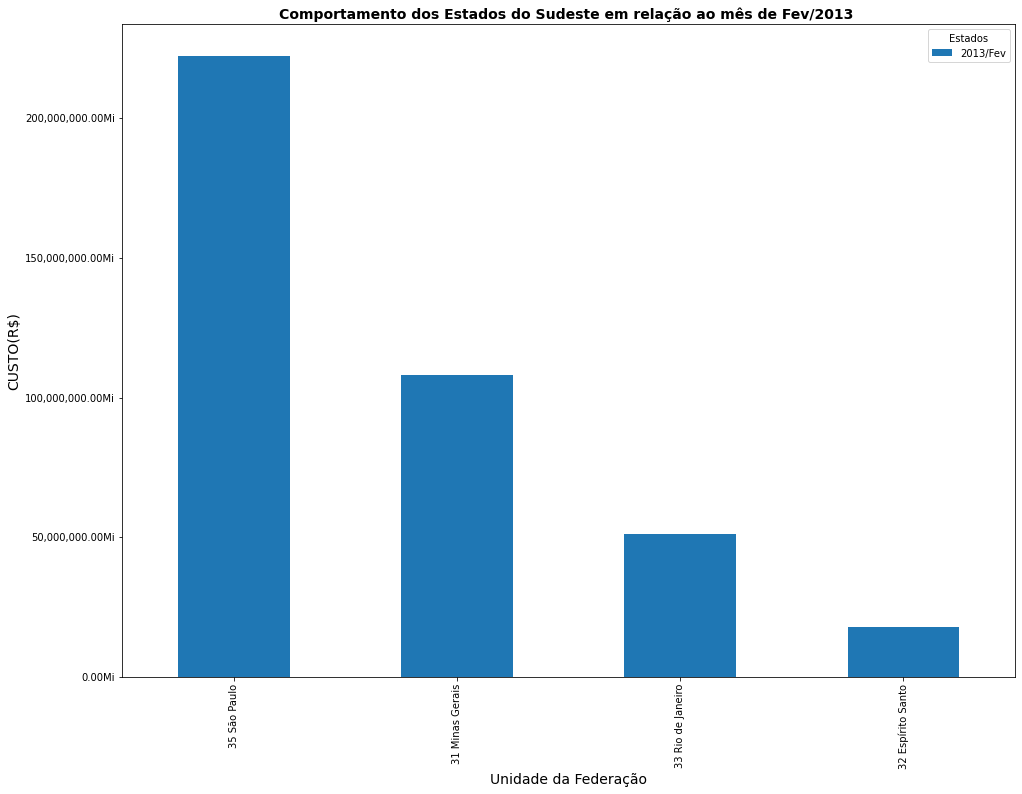

In [ ]:
ax = sudeste.plot( y='2013/Fev',kind='bar',figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Comportamento dos Estados do Sudeste em relação ao mês de Fev/2013 ', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

plt.show()

Pelo gráfico de barras percebe-se que São Paulo e Minas Gerais são os estados que mais gastaram em Fevereiro de 2013

## **Aula 3 - Desafio 7**

O Desafio 7, pede que os esatdos do sudeste sejam analisados juntos ao meu estado no caso Ceará

**1. Passo**

Anexando o Ceará aos estados sudestinos

In [ ]:
sudestelist_Ceará=sudeste.index.to_list()
sudestelist_Ceará.append('23 Ceará')
sudestelist_Ceará

['35 São Paulo',
 '31 Minas Gerais',
 '33 Rio de Janeiro',
 '32 Espírito Santo',
 '23 Ceará']

**2. Passo**

Plotando o Gráfico dos gastos sudestinos em relação ao Ceará

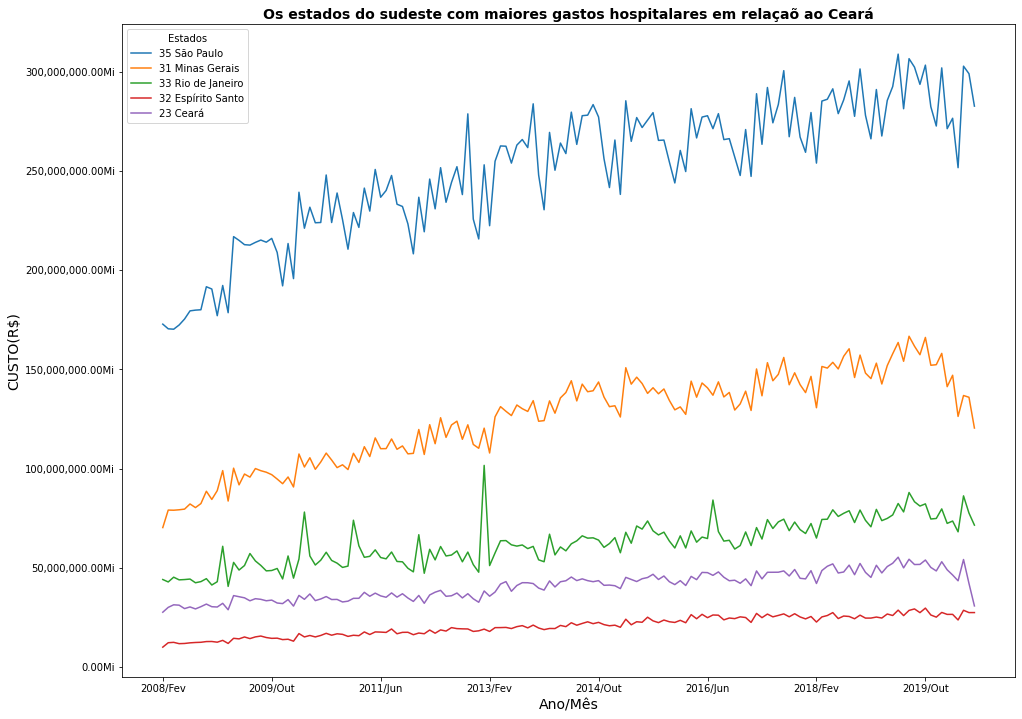

In [ ]:
ax= ordenado_por_total[ordenada_por_total_noReg].loc[sudestelist_Ceará].T.plot(figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Os estados do sudeste com maiores gastos hospitalares em relaçaõ ao Ceará', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#mostrando o gráfico 
plt.show()


Pelo gráfico de linhas fica dificil observar o comportamento do estado do Ceará em relação ao sudeste

**3. Passo**

Plotando o Gráfico dos gastos sudestinos em relação ao Ceará no mês de 2013/Fev

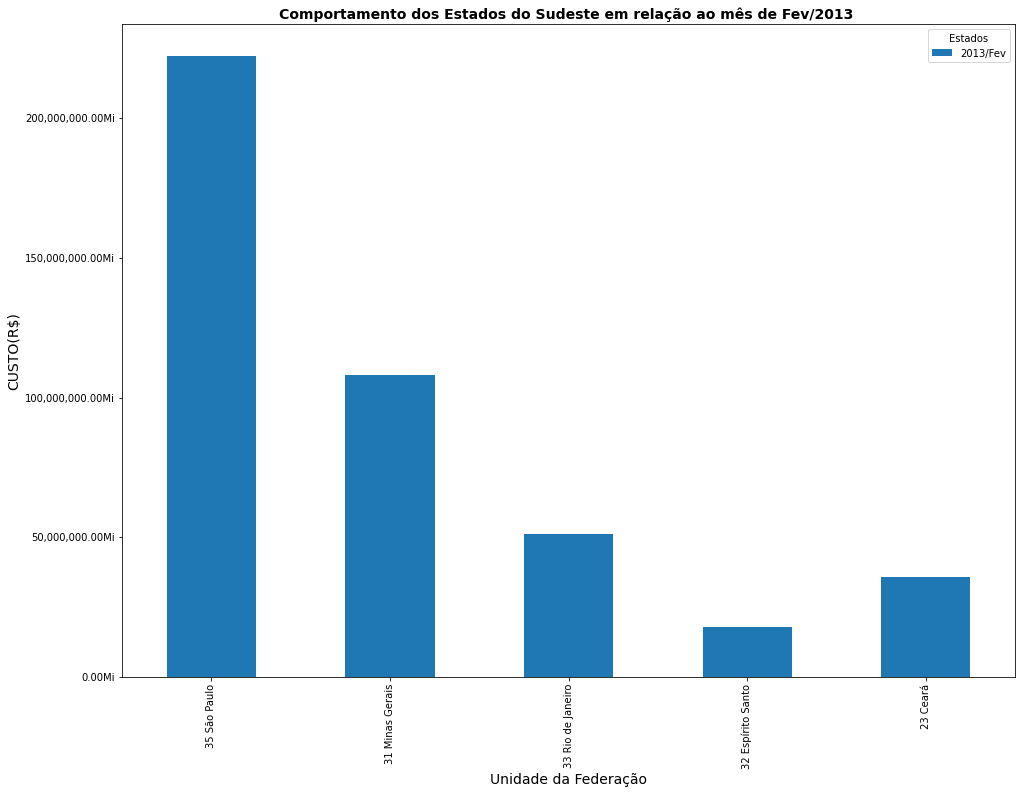

In [ ]:
ax = ordenado_por_total[ordenada_por_total_noReg].loc[sudestelist_Ceará].plot( y='2013/Fev',kind='bar',figsize=(16,12))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))

#criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Comportamento dos Estados do Sudeste em relação ao mês de Fev/2013 ', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

plt.show()

Percebe-se que em relação ao Sudeste, o estado do Ceará se sobre-sai ao estado do Espirito Santo no mês de Fevereiro do ano de 2013

# AULA 4 - ANÁLISES DE GRÁFICOS E CRIAÇAÕ DE HIPÓTESES

Nessa aula continua-se o tratamento dos dados do dataset de gastos hospitalares nesse 1. Passo, será dividido os valores das colunas por 1000000 para facilitar a leitura dos gráficos 

**1. Passo** 

Observando todas as colunas criadas

In [ ]:
ordenado_por_total.columns

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Região'],
      dtype='object', length=151)

Nos desafios eu ja tinha criado uma váriavel que continha as colunas  do ordenado_por_total com excessão da coluna Região 

**2. Passo**

Plotando o gráfico

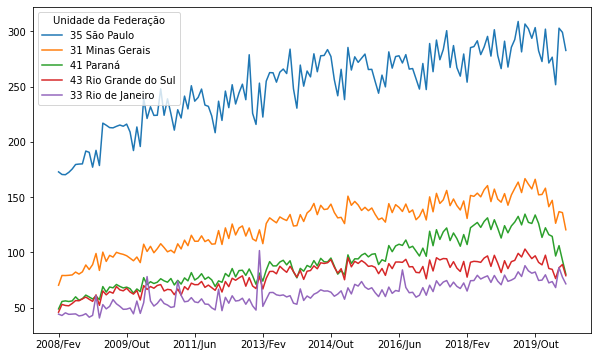

In [ ]:
ordenado_por_total[ordenada_por_total_noReg] = ordenado_por_total[ordenada_por_total_noReg]/1000000
ordenado_por_total[ordenada_por_total_noReg].head().T.plot(figsize=(10,6))

**3. Passo**

Criando uma nova variavel para o meu dataframe 

In [ ]:
ordenado_por_total_2 = ordenado_por_total[ordenada_por_total_noReg]
ordenado_por_total_2.head()

2008/Fev  2008/Mar  ...  2020/Jun  2020/Jul
Unidade da Federação                      ...                    
35 São Paulo            172.83    170.48  ...    299.06    282.71
31 Minas Gerais          70.30     79.12  ...    135.98    120.47
41 Paraná                48.86     55.61  ...     92.90     80.32
43 Rio Grande do Sul     45.90     52.93  ...     89.02     78.93
33 Rio de Janeiro        44.12     42.89  ...     77.60     71.54

[5 rows x 150 columns]

Utilizando apenas os três primeiros estados do meu top 5 e filtrando as datas a partir de 2018 

um slicer de aproximadamente [48:]

In [ ]:
lista_ano = ordenado_por_total_2.columns.tolist()
for i,v in enumerate(lista_ano):
  print(i,v)

0 2008/Fev
1 2008/Mar
2 2008/Abr
3 2008/Mai
4 2008/Jun
5 2008/Jul
6 2008/Ago
7 2008/Set
8 2008/Out
9 2008/Nov
10 2008/Dez
11 2009/Jan
12 2009/Fev
13 2009/Mar
14 2009/Abr
15 2009/Mai
16 2009/Jun
17 2009/Jul
18 2009/Ago
19 2009/Set
20 2009/Out
21 2009/Nov
22 2009/Dez
23 2010/Jan
24 2010/Fev
25 2010/Mar
26 2010/Abr
27 2010/Mai
28 2010/Jun
29 2010/Jul
30 2010/Ago
31 2010/Set
32 2010/Out
33 2010/Nov
34 2010/Dez
35 2011/Jan
36 2011/Fev
37 2011/Mar
38 2011/Abr
39 2011/Mai
40 2011/Jun
41 2011/Jul
42 2011/Ago
43 2011/Set
44 2011/Out
45 2011/Nov
46 2011/Dez
47 2012/Jan
48 2012/Fev
49 2012/Mar
50 2012/Abr
51 2012/Mai
52 2012/Jun
53 2012/Jul
54 2012/Ago
55 2012/Set
56 2012/Out
57 2012/Nov
58 2012/Dez
59 2013/Jan
60 2013/Fev
61 2013/Mar
62 2013/Abr
63 2013/Mai
64 2013/Jun
65 2013/Jul
66 2013/Ago
67 2013/Set
68 2013/Out
69 2013/Nov
70 2013/Dez
71 2014/Jan
72 2014/Fev
73 2014/Mar
74 2014/Abr
75 2014/Mai
76 2014/Jun
77 2014/Jul
78 2014/Ago
79 2014/Set
80 2014/Out
81 2014/Nov
82 2014/Dez
83 2015/Jan
84

Transformando em lista e usando o método enumerate, eu consigo obter o indice de cada ano do meu dataset. 

A data 2012/Jan, equivale ao indice 47

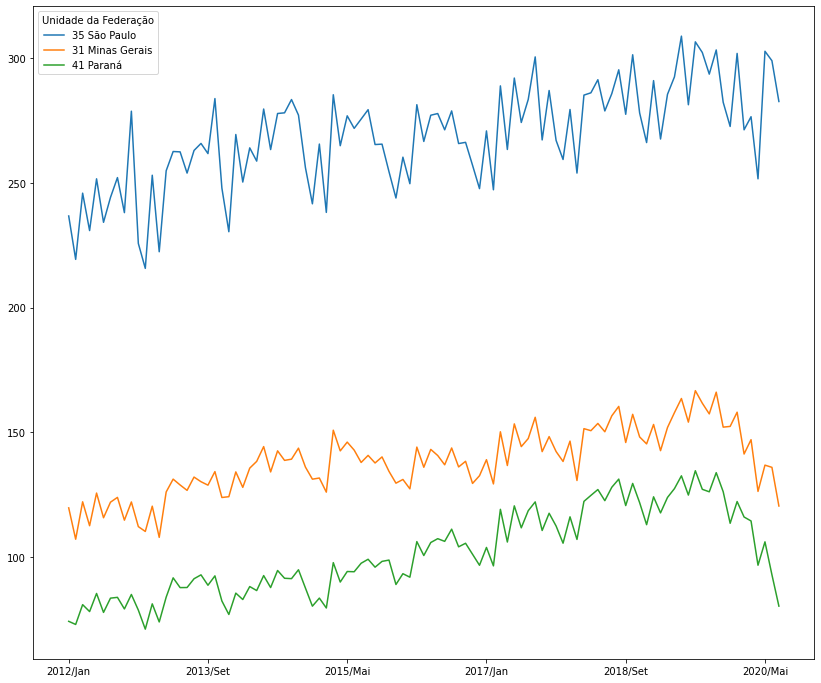

In [ ]:
ordenado_por_total_2[ordenado_por_total_2.columns[47:]].head(3).T.plot(figsize=(14,12))

Criando um gap de tempo para nossa analise

indo de 2012/Jan e 2020/Fev

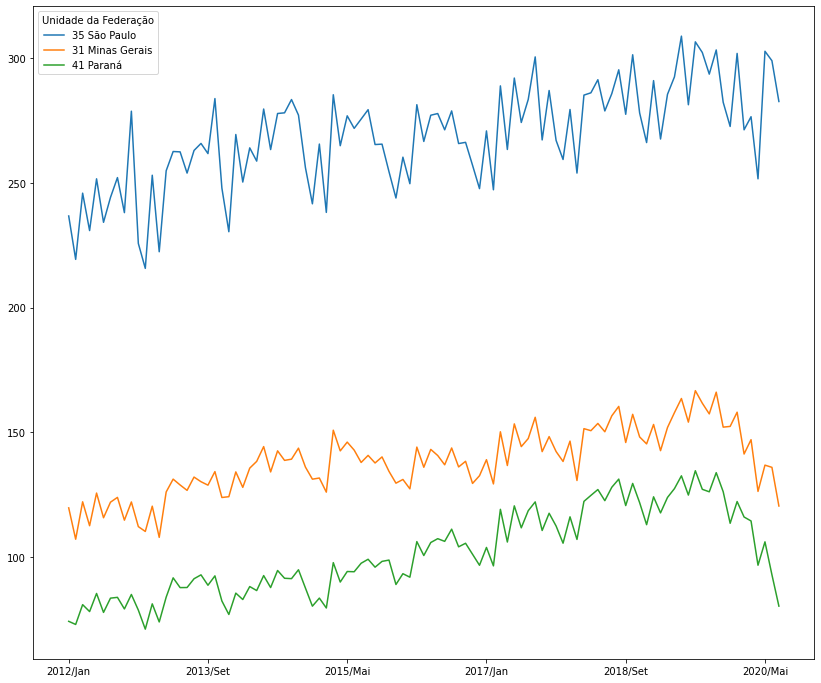

In [ ]:
ordenado_por_total_2[ordenado_por_total_2.columns[47:150]].head(3).T.plot(figsize=(14,12))

Por esse gráfico percebemos que São Paulo gastou 4 vezes a mais que Paraná

(0.0, 350.0)

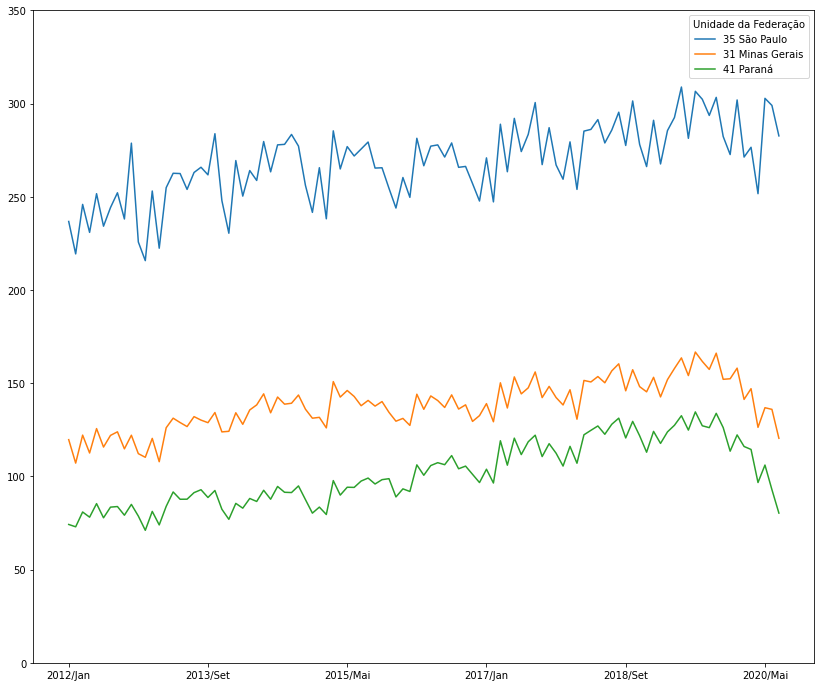

In [ ]:
meses_filtrados = ordenado_por_total_2.columns[47:150]
ordenado_por_total_2[meses_filtrados].head(3).T.plot(figsize=(14,12))
plt.ylim(0,350)

Quando a gente estabelece medidas para o eixo, percebemos que a diferença do paraná para São Paulo, não é de 4 vezes mais, mas aproximadamente 2.8.

Isso signifca que nosso gráfico estava modificado e a gente deve ter cuidado de passar uma mensagem adequada e não criar ilusões

O eixo x também deve ser observado com carinho, ele pode contar uma história que as vezes é uma mentira 

(0.0, 350.0)

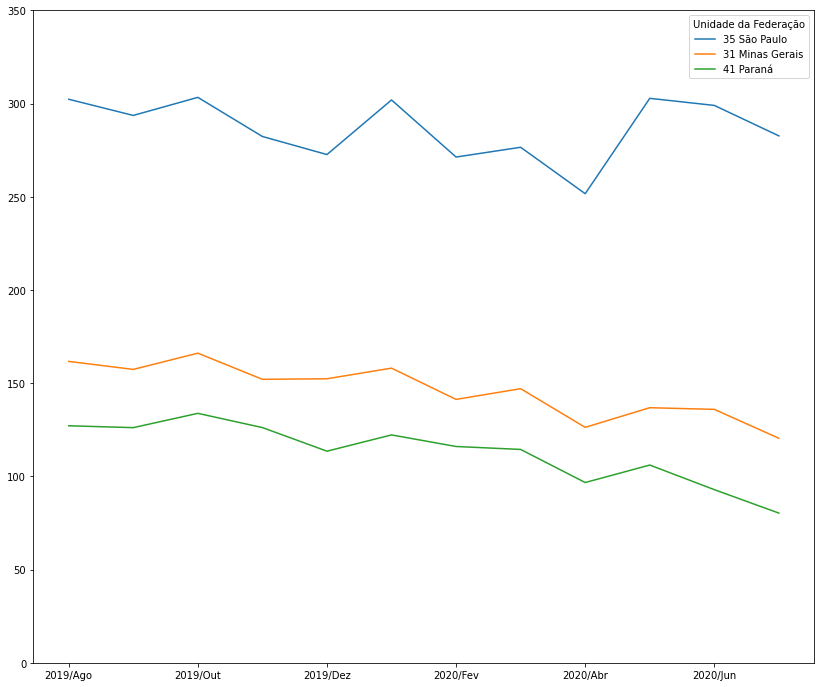

In [ ]:
ordenado_por_total_2[ordenado_por_total_2.columns[-12:]].head(3).T.plot(figsize=(14,12))
plt.ylim(0,350)

Esse gráfico nos diz que os custos estão caindo 

(0.0, 350.0)

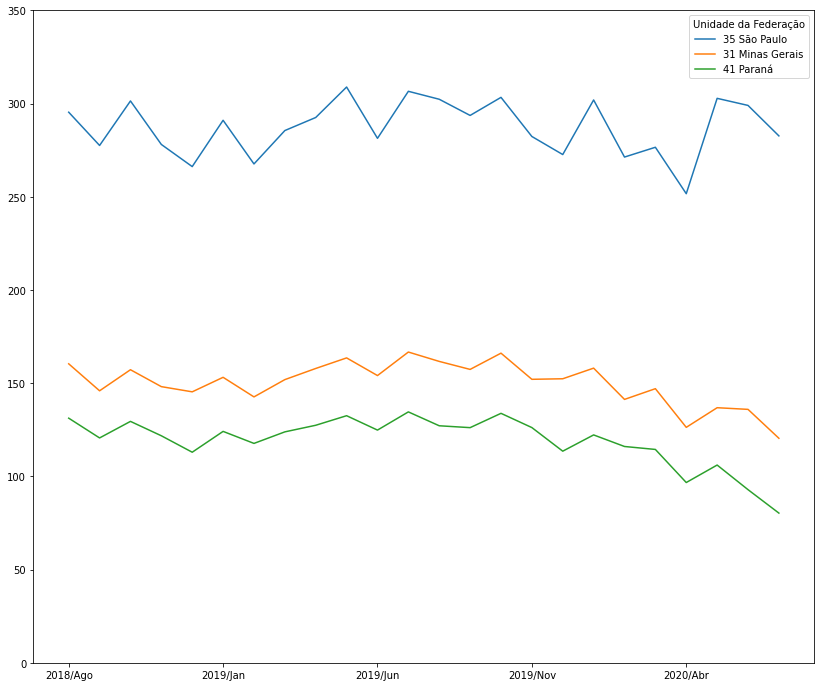

In [ ]:
ordenado_por_total_2[ordenado_por_total_2.columns[-24:]].head(3).T.plot(figsize=(14,12))
plt.ylim(0,350)

Se eu escolho os ultimos  24 meses, percebe-se que ta mais ou menos parados

(0.0, 350.0)

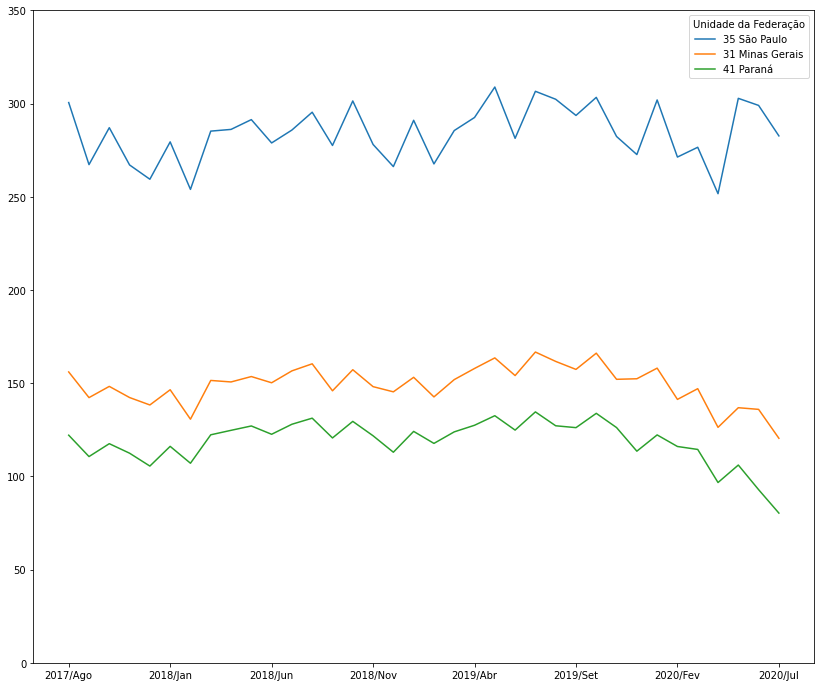

In [ ]:
ordenado_por_total_2[ordenado_por_total_2.columns[-36:]].head(3).T.plot(figsize=(14,12))
plt.ylim(0,350)

Aumentando esse valor, você entende que na verdade esses valores estão subindo. Por tanto a janela de tempo (eixo x) ele pode contar uma informação falsa para as pessoas. TEM QUE TER ATENÇÃO 

A escala do gráfico tbm pode enganar, imagens achatadas podem iludir 

(0.0, 350.0)

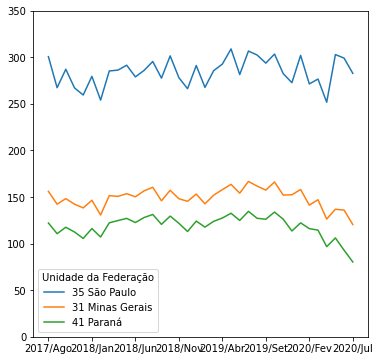

In [ ]:
ordenado_por_total_2[ordenado_por_total_2.columns[-36:]].head(3).T.plot(figsize=(6,6))
plt.ylim(0,350)

Nessa aula, foi possivel aprender que:

 Os gráficos plotados trazem informações que quando não bem formatos, podem passar uma mensagem equivocado, ou uma mentira. A analise quando feita deve ter em mente que está retratanto uma parte especifica de um contexto geral e trabalhar a percepeção nos gráifcos, auxilia muito na transmissão dessa mensagem.

## Aula 4 - Desafio 1

O Desafio da aula 4, pede que se refaça algumas analises, eu preferi da prosseguimento as analises referentes aos casos de dengue.


A Proposta seria observar como foi a evolução da dengue ao longo dos anos e não mais por mês, para isso preciso criar uma somatoria dos dados do meu dataframe.

**1. Passo**

Ordenando pelo Total 

In [ ]:
dados_dengue['Total']=dados_dengue[dados_dengue.columns[:-1]].sum(axis=1)
dados_dengue=dados_dengue.sort_values('Total',ascending=False)
dados_dengue2=dados_dengue
dados_dengue2=dados_dengue2.drop('Total',axis=1)
dados_dengue2.head()

2008/Fev  2008/Mar  ...  2020/Mar        Região
Unidade da Federação                      ...                        
29 Bahia                   291       961  ...       464      Nordeste
52 Goiás                   583      1108  ...       487  Centro-Oeste
31 Minas Gerais            105       370  ...       514       Sudeste
35 São Paulo                85       189  ...      1315       Sudeste
33 Rio de Janeiro         1704      4996  ...        32       Sudeste

[5 rows x 86 columns]

**2. passo**

Criando a soma de cada ano e criando colunas, referentes a essa soma

In [ ]:
mes_ano2 = dados_dengue.columns[:-1]
for i,k in enumerate(mes_ano2):
  print(i,k) 

0 2008/Fev
1 2008/Mar
2 2008/Abr
3 2008/Mai
4 2009/Fev
5 2009/Mar
6 2009/Dez
7 2010/Jan
8 2010/Fev
9 2010/Mar
10 2010/Abr
11 2010/Mai
12 2010/Jun
13 2010/Jul
14 2010/Nov
15 2010/Dez
16 2011/Jan
17 2011/Fev
18 2011/Mar
19 2011/Abr
20 2011/Mai
21 2011/Out
22 2011/Dez
23 2012/Jan
24 2012/Mar
25 2012/Abr
26 2012/Mai
27 2012/Jun
28 2012/Jul
29 2012/Out
30 2012/Nov
31 2013/Jan
32 2013/Fev
33 2013/Mar
34 2013/Abr
35 2013/Mai
36 2013/Nov
37 2014/Jan
38 2014/Fev
39 2014/Mai
40 2014/Jul
41 2014/Nov
42 2015/Jan
43 2015/Fev
44 2015/Mar
45 2015/Abr
46 2015/Mai
47 2015/Jun
48 2015/Jul
49 2015/Ago
50 2015/Set
51 2015/Out
52 2015/Nov
53 2015/Dez
54 2016/Jan
55 2016/Fev
56 2016/Mar
57 2016/Abr
58 2016/Jun
59 2016/Jul
60 2016/Ago
61 2016/Set
62 2016/Out
63 2016/Nov
64 2016/Dez
65 2017/Jan
66 2017/Fev
67 2017/Mar
68 2017/Mai
69 2017/Jun
70 2017/Jul
71 2017/Set
72 2018/Fev
73 2018/Mar
74 2019/Jan
75 2019/Fev
76 2019/Abr
77 2019/Mai
78 2019/Jun
79 2019/Jul
80 2019/Ago
81 2019/Nov
82 2019/Dez
83 2020/Jan
84

In [ ]:
dengue_2008 = mes_ano2[0:4]
dengue_2009 = mes_ano2[4:6]
dengue_2010 = mes_ano2[6:15]
dengue_2011 = mes_ano2[15:22]
dengue_2012 = mes_ano2[22:30]
dengue_2013 = mes_ano2[30:36]
dengue_2014 = mes_ano2[36:41]
dengue_2015 = mes_ano2[41:53]
dengue_2016 = mes_ano2[53:64]
dengue_2017 = mes_ano2[64:71]
dengue_2018 = mes_ano2[71:73]
dengue_2019 = mes_ano2[73:82]
dengue_2020 =mes_ano2[82:]

In [ ]:
dados_dengue2['2008'] = dados_dengue2[dengue_2008].sum(axis=1)
dados_dengue2['2009'] = dados_dengue2[dengue_2009].sum(axis=1)
dados_dengue2['2010'] = dados_dengue2[dengue_2010].sum(axis=1)
dados_dengue2['2011'] = dados_dengue2[dengue_2011].sum(axis=1)
dados_dengue2['2012'] = dados_dengue2[dengue_2012].sum(axis=1)
dados_dengue2['2013'] = dados_dengue2[dengue_2013].sum(axis=1)
dados_dengue2['2014'] = dados_dengue2[dengue_2014].sum(axis=1)
dados_dengue2['2015'] = dados_dengue2[dengue_2015].sum(axis=1)
dados_dengue2['2016'] = dados_dengue2[dengue_2016].sum(axis=1)
dados_dengue2['2017'] = dados_dengue2[dengue_2017].sum(axis=1)
dados_dengue2['2018'] = dados_dengue2[dengue_2018].sum(axis=1)
dados_dengue2['2019'] = dados_dengue2[dengue_2019].sum(axis=1)
dados_dengue2['2020'] = dados_dengue2[dengue_2020].sum(axis=1)

In [ ]:
dados_dengue2= dados_dengue2[dados_dengue2.columns[85:]]
dados_dengue2.head()

Região   2008  2009   2010  ...  2017  2018  2019  2020
Unidade da Federação                                    ...                        
29 Bahia                  Nordeste   4946  7101  10090  ...  1494   141  3311   833
52 Goiás              Centro-Oeste   3923   596   9798  ...  2306   753  5598   973
31 Minas Gerais            Sudeste   1950  1102   7006  ...  1446   178  8984  1008
35 São Paulo               Sudeste    680   229   6136  ...   486   149  8464  2474
33 Rio de Janeiro          Sudeste  14572   419   3961  ...   242    48   535    98

[5 rows x 14 columns]

**3. Passo**

Plotando os Gráficos

**TOP 5 - CASOS DE DENGUE**

criando a filtragem dos 5 primeiros estados

In [ ]:
top_5dengue = dados_dengue2[dados_dengue2.columns[1:]].head()
top_5dengue

2008  2009   2010  2011  ...  2017  2018  2019  2020
Unidade da Federação                            ...                        
29 Bahia               4946  7101  10090  6985  ...  1494   141  3311   833
52 Goiás               3923   596   9798  2433  ...  2306   753  5598   973
31 Minas Gerais        1950  1102   7006  1974  ...  1446   178  8984  1008
35 São Paulo            680   229   6136  2774  ...   486   149  8464  2474
33 Rio de Janeiro     14572   419   3961  8497  ...   242    48   535    98

[5 rows x 13 columns]

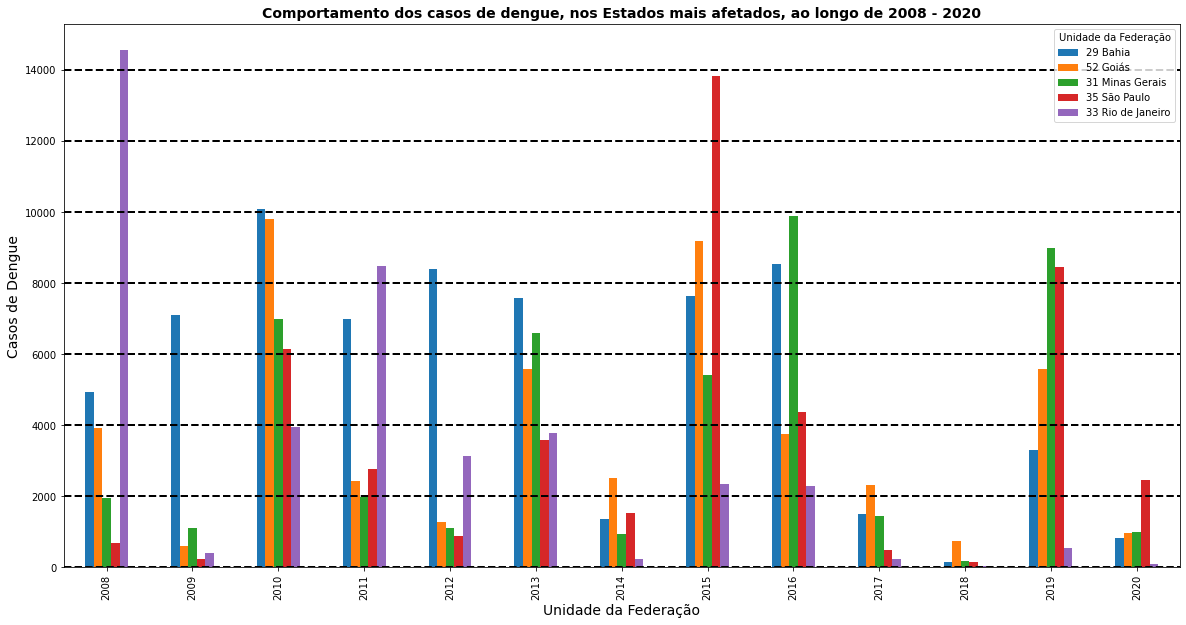

In [ ]:
ax=top_5dengue.T.plot(kind='bar', figsize=(20,10))

#Criando titulos
plt.ylabel('Casos de Dengue', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Comportamento dos casos de dengue, nos Estados mais afetados, ao longo de 2008 - 2020',fontsize = 14, fontweight = 'bold')

#Criando o grid
plt.grid(axis='y',color='black',linestyle='--',linewidth=2)


plt.show()

**CASOS DE DENGUE POR REGIÃO**

Através do método groupby é possivel agrupar o dataset por regiões e conseguir o somatório dos casos por ano

In [ ]:
dados_dengue_Reg = dados_dengue2.set_index('Região')
dados_dengue_Reg

2008  2009   2010  2011  2012  ...  2016  2017  2018  2019  2020
Região                                        ...                              
Nordeste       4946  7101  10090  6985  8395  ...  8554  1494   141  3311   833
Centro-Oeste   3923   596   9798  2433  1267  ...  3744  2306   753  5598   973
Sudeste        1950  1102   7006  1974  1114  ...  9882  1446   178  8984  1008
Sudeste         680   229   6136  2774   872  ...  4368   486   149  8464  2474
Sudeste       14572   419   3961  8497  3145  ...  2281   242    48   535    98
Nordeste       6677   715   3876  8000  3411  ...  2554  1268    88  1401   359
Norte          4764  1642   4768  7086  4186  ...  2787  1812   142   907   311
Nordeste       2197   533   2373  3916  3392  ...  4505  1746   143  1676   258
Nordeste       1961   119   4075  3121  2489  ...  3404   282   106  1782   129
Sul             165    42   1962  1601   256  ...  2475   232    55  1285  3493
Centro-Oeste    153   165   4108   793   469  ...  2433   207    54  2521  1818
Norte           748   736   5182  1968  1089  ...  1326   484    59   342   281
Sudeste        1265  1080   1547  2748   816  ...  1986   599    68  1860   438
Centro-Oeste    459   453   5133   839  2063  ...   789   257    95   604   678
Nordeste       1211   396   2814  1925  1945  ...   635   433    27   767    38
Nordeste       1800   142   1664  2014  1098  ...  2030   164    85  1224    63
Nordeste       2842   113    808  2293  1368  ...  1973   124    42   630    50
Nordeste        962    62   2569   605  1072  ...   873   115    26  1062    73
Norte           934   234   1266   776   838  ...   389   242     7   511    52
Norte           775    89    427  2111   135  ...   268    98     6    81   138
Centro-Oeste    141    35    761   294   150  ...   723   210     8   923   282
Nordeste       1899    90    150   394   455  ...   101    23     6   898    53
Norte            67   267    705   472   145  ...   104    48    22   192   202
Norte           242   238   1050   139   227  ...    46    40     3    62    48
Norte            76    51    136   224    82  ...    60    32     7    29     5
Sul              11     4    175    64    16  ...   213    45     6    77    50
Sul              10     2     38    18    13  ...   405    37     8   103    49

[27 rows x 13 columns]

In [ ]:
Reg_dengue= dados_dengue_Reg.groupby(['Região']).sum()

Organizando as informações do maior valor para o menor

para isso é preciso criar a coluna TOTAL

In [ ]:
Reg_dengue['Total'] = Reg_dengue.sum(axis=1)
Reg_dengue.Total

Região
Centro-Oeste     85098
Nordeste        204539
Norte            69304
Sudeste         149045
Sul              19729
Name: Total, dtype: int64

Agora com a coluna total, é possivel fazer a organização dos dados de acordo com o maior valor, usando o metodo sort_values(ascending=False)

In [ ]:
Reg_dengue.sort_values('Total', ascending=False)

2008  2009   2010   2011   2012  ...  2017  2018   2019  2020   Total
Região                                          ...                                 
Nordeste      24495  9271  28419  29253  23625  ...  5649   664  12751  1856  204539
Sudeste       18467  2830  18650  15993   5947  ...  2773   443  19843  4018  149045
Centro-Oeste   4676  1249  19800   4359   3949  ...  2980   910   9646  3751   85098
Norte          7606  3257  13534  12776   6702  ...  2756   246   2124  1037   69304
Sul             186    48   2175   1683    285  ...   314    69   1465  3592   19729

[5 rows x 14 columns]

Ja aqui é possivel perceber que a região com maior predominância de casos de dengue, é a região Nordeste.

Para as plotagens de gráficos, não será necessário a utilização da coluna Total, portanto deve-se retira-la, logo após ser salvo a organização do Dataframe

In [ ]:
Reg_dengue = Reg_dengue.sort_values('Total', ascending=False)
Reg_dengue.drop('Total',axis=1,inplace=True)
Reg_dengue

2008  2009   2010   2011   2012  ...   2016  2017  2018   2019  2020
Região                                          ...                                
Nordeste      24495  9271  28419  29253  23625  ...  24629  5649   664  12751  1856
Sudeste       18467  2830  18650  15993   5947  ...  18517  2773   443  19843  4018
Centro-Oeste   4676  1249  19800   4359   3949  ...   7689  2980   910   9646  3751
Norte          7606  3257  13534  12776   6702  ...   4980  2756   246   2124  1037
Sul             186    48   2175   1683    285  ...   3093   314    69   1465  3592

[5 rows x 13 columns]

**PLOTANDO OS GRÁFICOS**

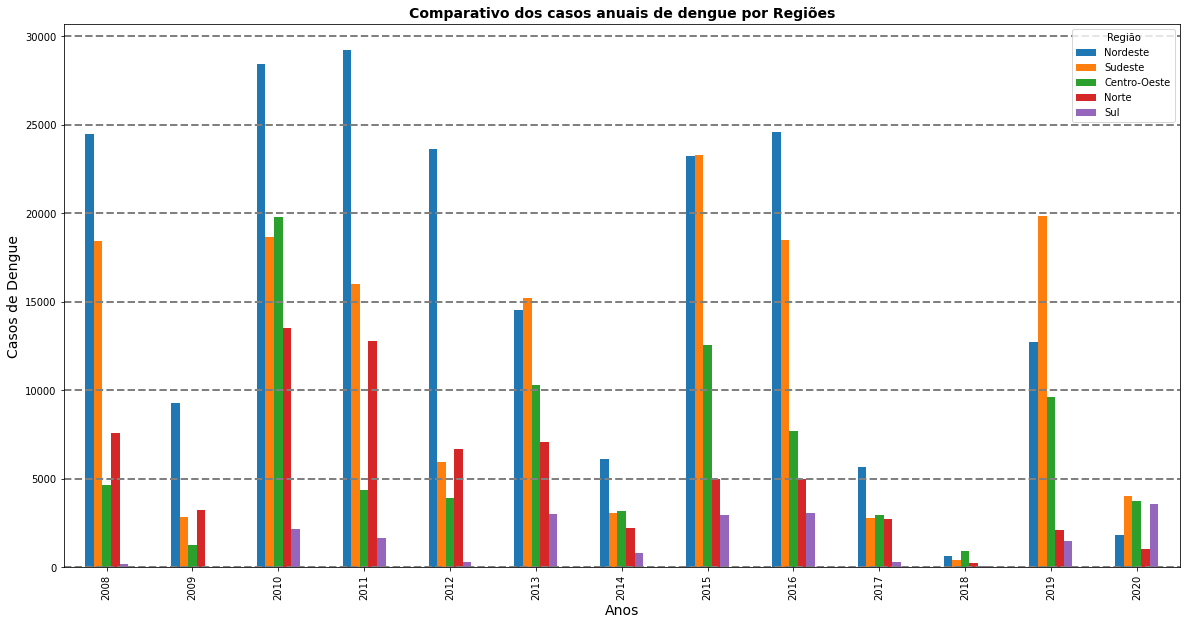

In [ ]:
ax=Reg_dengue.T.plot(kind='bar',figsize=(20,10))

#Criando Titulos
plt.ylabel('Casos de Dengue', fontsize=14)
plt.xlabel('Anos', fontsize=14)
plt.title('Comparativo dos casos anuais de dengue por Regiões', fontsize=14, fontweight= 'bold')

#Criando o grid
plt.grid(axis='y', color='gray', linestyle='--', linewidth=2)

plt.show()

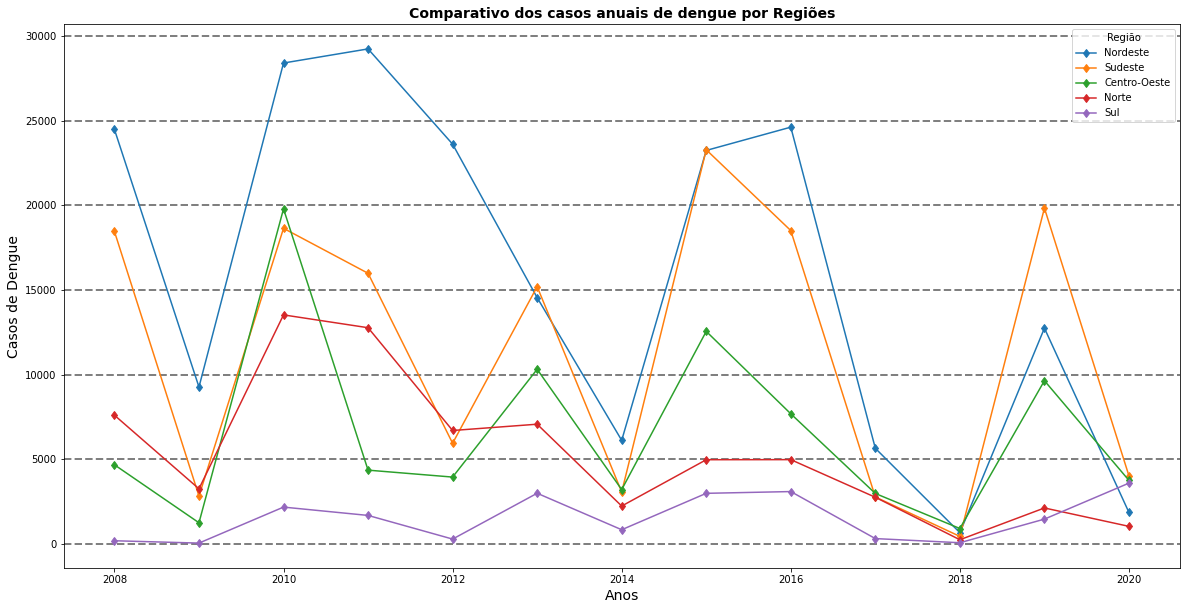

In [ ]:
ax=Reg_dengue.T.plot(kind='line',figsize=(20,10), marker='d')

#Criando Titulos
plt.ylabel('Casos de Dengue', fontsize=14)
plt.xlabel('Anos', fontsize=14)
plt.title('Comparativo dos casos anuais de dengue por Regiões', fontsize=14, fontweight= 'bold')

#Criando o grid
plt.grid(axis='y', color='gray', linestyle='--', linewidth=2)

plt.show()

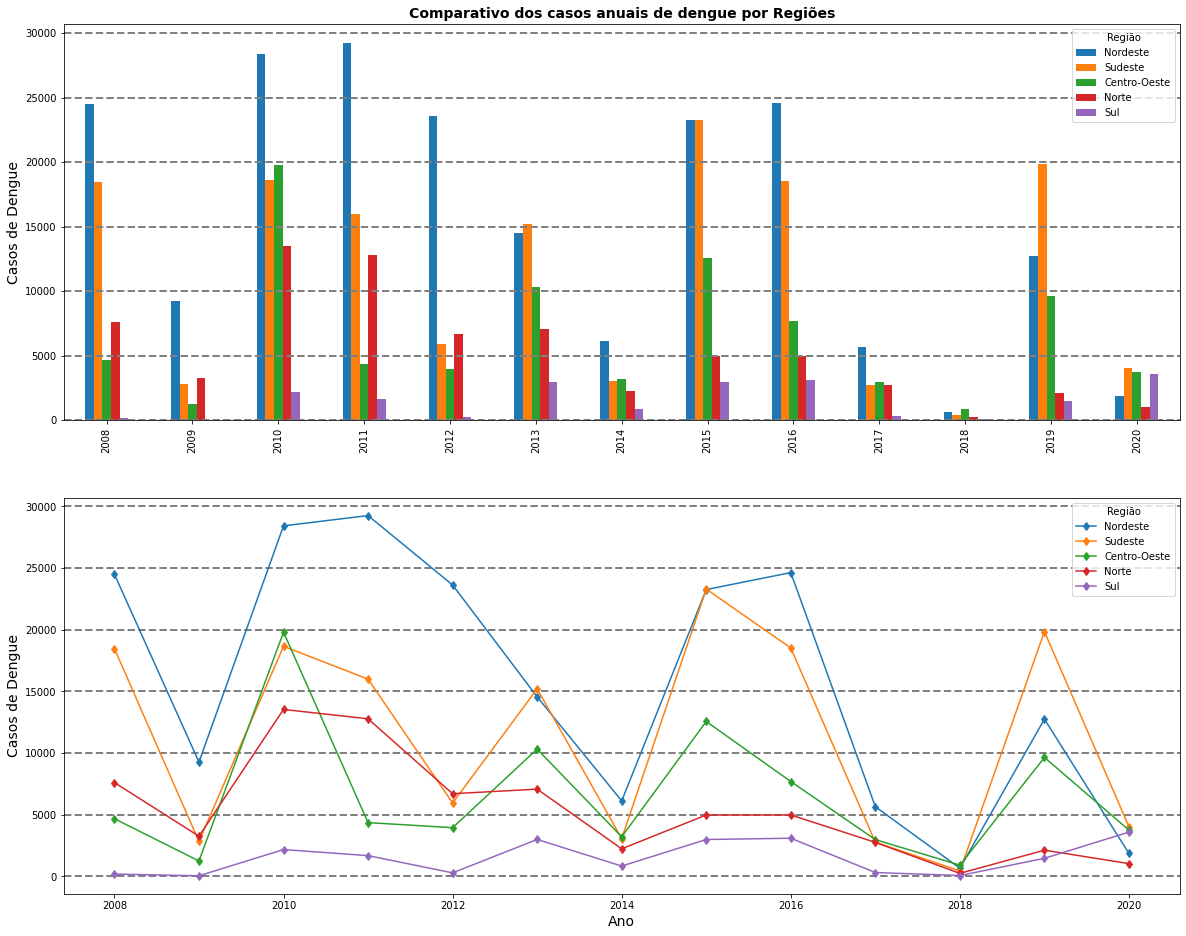

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,16))

#Subplot 1 
Reg_dengue.T.plot(kind='bar', ax=ax1)
#Subplot 2
Reg_dengue.T.plot(kind='line',marker='d', ax=ax2)

#Configurações subplot 1
ax1.set_ylabel('Casos de Dengue', fontsize=14)
ax1.set_title('Comparativo dos casos anuais de dengue por Regiões', fontsize=14, fontweight= 'bold')
ax1.grid(axis='y',color='grey',linestyle='--',linewidth=2,)


#Configurações subplot2
ax2.set_ylabel('Casos de Dengue', fontsize=14)
ax2.set_xlabel('Ano', fontsize=14)
ax2.grid(axis='y',color='grey',linestyle='--',linewidth=2,)
plt.subplots_adjust(hspace=0.195)
plt.show()

Importante notar que a prevalência dos casos de dengue ao longo dos anos. Não consegui encontrar embasamento cientifico que possa explicar o motivo dessa prevalência na região, contudo a prevalência da doença como ja explicado está associado a mudanças climáticas especificas, bastantes comuns nos semestres iniciais na região

# AULA 5 - Manipulação e Interpretação de Gráficos

Essa aula se propõem a continuar a analise sobre os tipos de gráficos e a compreensão das mensagens


---


**1. Passo**

Analisando o ultimo mês do meu data_frame `ordenado_por_total[ordenada_por_total_noReg]`

In [ ]:
ordenado_por_total_2.columns[-1]

'2020/Jul'

Através do método `colum` (referentes aos meses do nosso dataframe) e de um slicer, podemos acessar a ultima coluna que se refere ao ultimo mês

`[-1]` é sempre referente a o ultimo elemento de uma lista ou array



---



Existe um problema nessa analise é que esses dados são lançados por semana, então não necessariamente esse mês esta complemento.

É importante se atentar, que estamos trabalhando por data de atendimento e não de processamento e isso indica, que o valor de um mês (por exemplo julho) se estiver igual a 1000, daqui a alguns meses ele irá aumentar. 

Uma vez que os casos processados em julho, só serão adicionados a tabela, com o passar dos meses


---

Portanto os gráficos de linha, sempre terminam em uma queda, pois eles sempre estão um pouco abaixo do valor total (que só será preenchido com o processamento de todos os casos, o que é feito muito tempo depois)

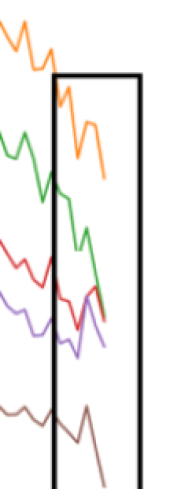

Lembrar então que na medida que esses dados são atualizados e o tempo  passa, o aumento dos valores ocorre sempre pra trás 


In [ ]:
mes_mais_recente = ordenado_por_total_2.columns[-1]
mes_mais_recente

'2020/Jul'

**2. Passo**

Agrora criando a váriavel que contem os gastos_do_mes_recente

In [ ]:
gastos_do_mes_recente = ordenado_por_total_2[mes_mais_recente]
gastos_do_mes_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

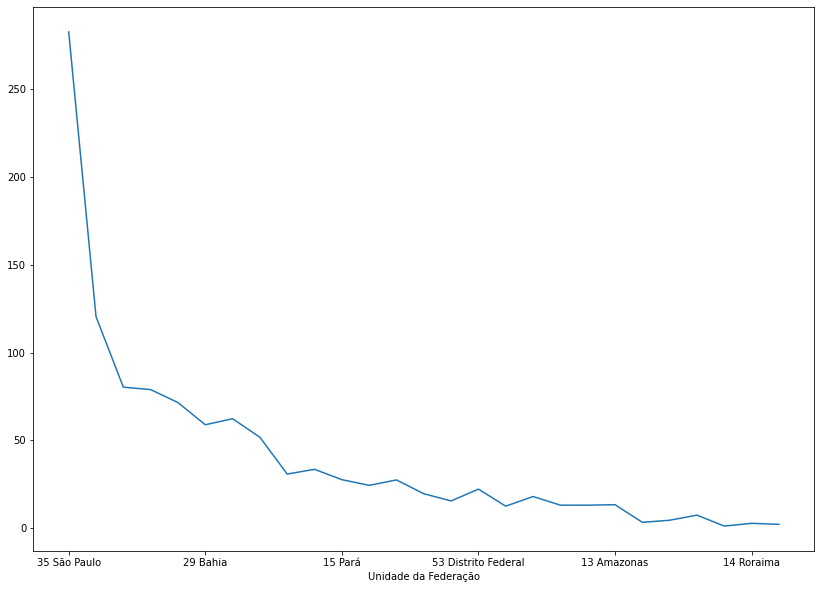

In [ ]:
gastos_do_mes_recente.plot(figsize=(14,10))
plt.show()

Para essa análise o gráfico de linhas não diz, ou  demonstra as informações necessárias para minhas análises

Plotando agora com o tipo pizza

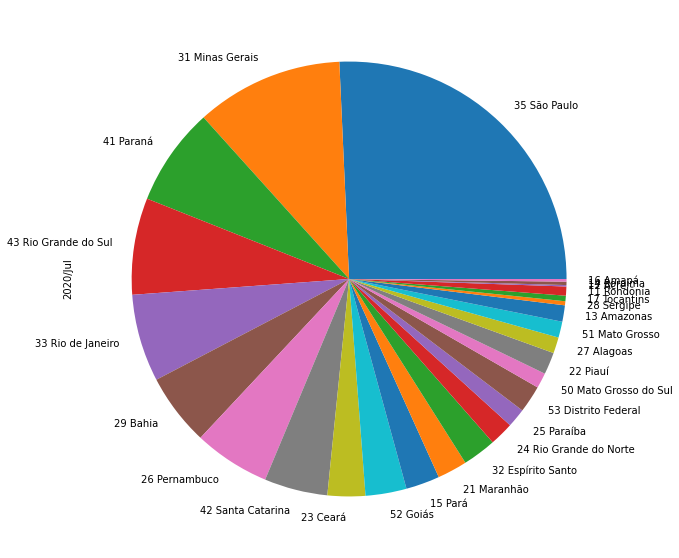

In [ ]:
gastos_do_mes_recente.plot(kind='pie', figsize=(14,10))
plt.show()

O gráfico acima tem diversos problemas são eles:

* Sobretudo a legenda, ja que são 27 locais com informações distintas. O que dificulta e muito a compreensão dos dados.

* Número de fatias, inacreditavel (considerando uma pizza verdadeira, existem fatias que não conseguiriam ser cortadas), o gráfico pegou valroes grandes e transformou em porcentagem

* Existem cores repetidas

* Não sabemos a proporção entre cada fatia

**O GRÁFICO DE PIZZA É PESSIMO PARA COMPARAÇÕES**

Ja estamos com uma vantagem
* O gráfico veio ordenado, se ele não tivesse ordenado, so conseguiriamos saber que São Paulo seria o estado com maiores valores de gastos

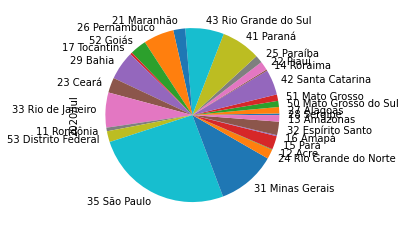

In [ ]:
gastos_do_mes_recente.sample(frac=1).plot(kind='pie')

É simplesmente impossivel saber a ordem nesse gráfico 



---



In [ ]:
gastos_do_mes_recente

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

A vizualização acima permite uma clareza maior sobre o entendimento sobre os gastos dos estados, do que o gráfico.

Consigo comparar os gráficos absolutos entre os estados da seguinte forma:

* "Quero saber quanto mais o Rio de Janeiro gastou do que outros estados"



---

**3. Passo**


In [ ]:
gastos_do_mes_recente / gastos_do_mes_recente['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

Consegue-se saber que a partir do Rio de Janeiro como referência, que:

Rio Grande do Sul (1.10) gastou 10% a mais que o Rio de Janeiro(1.00)

São paulo (3.95) gastou quase 4 vezes a mais que o RJ

---





---

O problema da analise acima é que tudo foi feito com tabela, que auxilia na leitura de algumas informações, mas que peca em outras que apenas a visualização gráfica possibilita

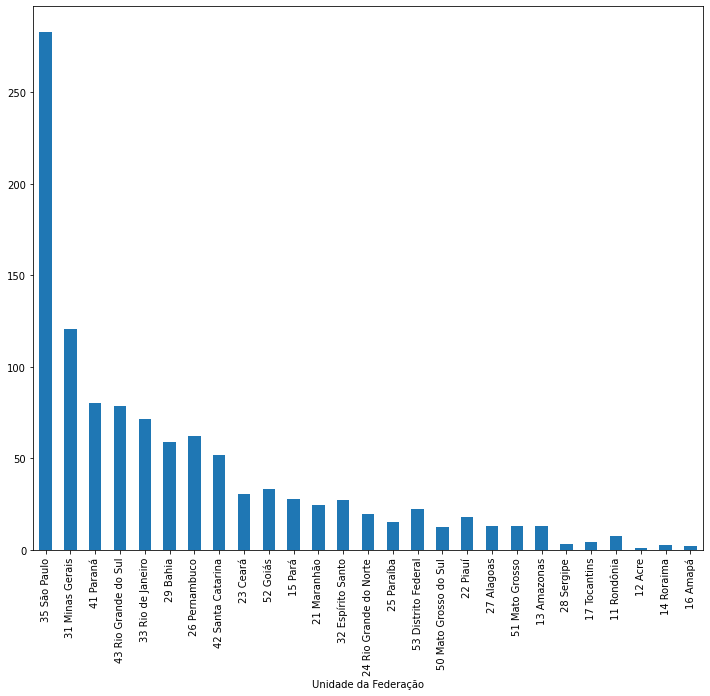

In [ ]:
gastos_do_mes_recente.plot(kind='bar', figsize=(12,10))
plt.show()

Esse gráfico está ordenado pelo TOTAL

**4. Passo**

Agora é preciso ordenar pelo mês mais recente, atraves do método `sort_values()`

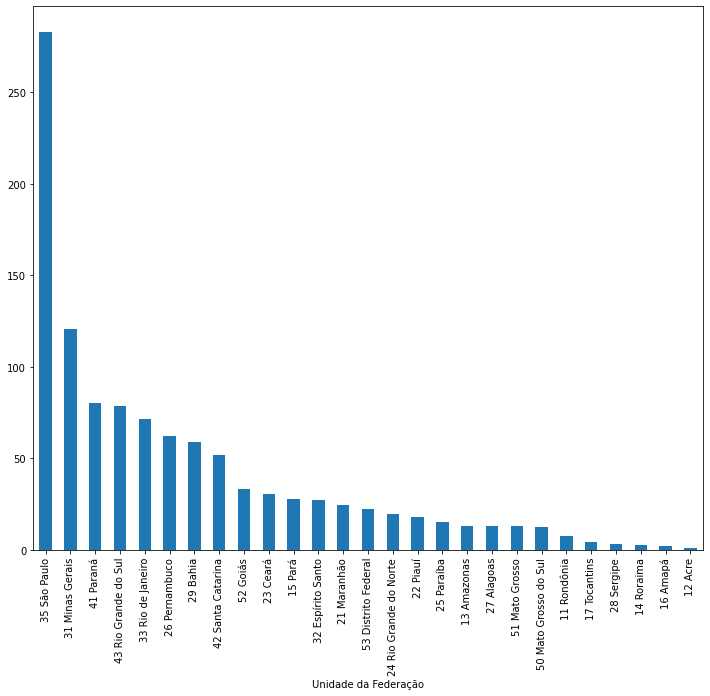

In [ ]:
gastos_do_mes_recente=gastos_do_mes_recente.sort_values(ascending=False)
gastos_do_mes_recente.plot(kind='bar',figsize=(12,10))

Nessa aula, foi possivel aprender que:

* Alguns gráficos complicam bastante a visualização da informação;
* Algumas analises a tabela por si, só é tão eficiente quanto o gráfico;
* Consigo saber quanto um estado gastou mais que os outros.

## Aula 5 - Desafio 1

O Desafio 1, pede que seja inserido grids nos gráficos

Segundo a [documentação das bibliotecas](https://), a forma de inserir grids é atráves do método:



```
matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)
```



Agora iremos plotar os gráficos novamente:

**Gastos do Mês mais recente:**

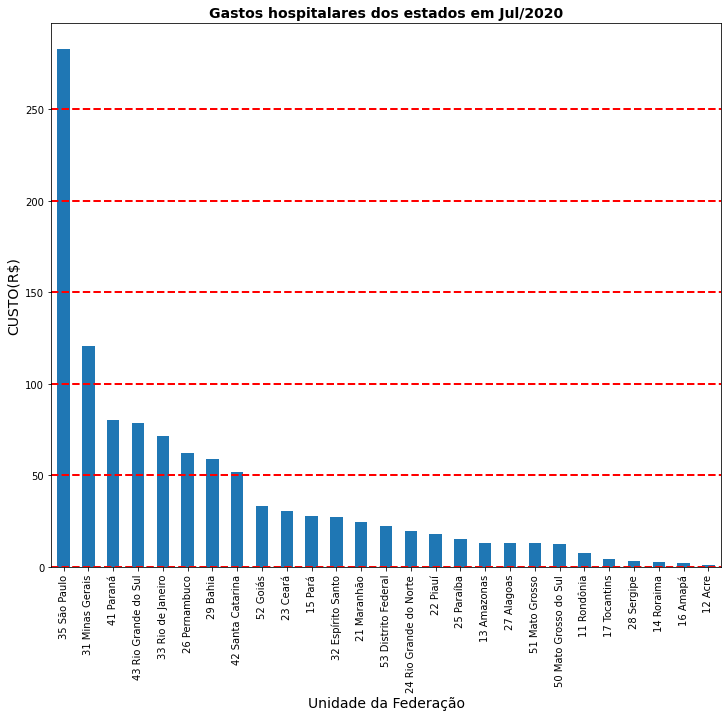

In [ ]:
ax=gastos_do_mes_recente.plot(kind='bar', figsize=(12,10))

#Criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Gastos hospitalares dos estados em Jul/2020',fontsize = 14, fontweight = 'bold')

#Criando o grid
plt.grid(axis='y',color='r',linestyle='--',linewidth=2,)


plt.show()




**Gastos do mês mais recente - comparando com o Rio de Janeiro**

In [ ]:
gastos_do_mes_recente_RJ = gastos_do_mes_recente / gastos_do_mes_recente['33 Rio de Janeiro']

#Ordenando os valores
gastos_do_mes_recente_RJ= gastos_do_mes_recente_RJ.sort_values(ascending=False)
gastos_do_mes_recente_RJ

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
26 Pernambuco            0.87
29 Bahia                 0.82
42 Santa Catarina        0.72
52 Goiás                 0.47
23 Ceará                 0.43
15 Pará                  0.39
32 Espírito Santo        0.38
21 Maranhão              0.34
53 Distrito Federal      0.31
24 Rio Grande do Norte   0.27
22 Piauí                 0.25
25 Paraíba               0.22
13 Amazonas              0.19
27 Alagoas               0.18
51 Mato Grosso           0.18
50 Mato Grosso do Sul    0.17
11 Rondônia              0.10
17 Tocantins             0.06
28 Sergipe               0.05
14 Roraima               0.04
16 Amapá                 0.03
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

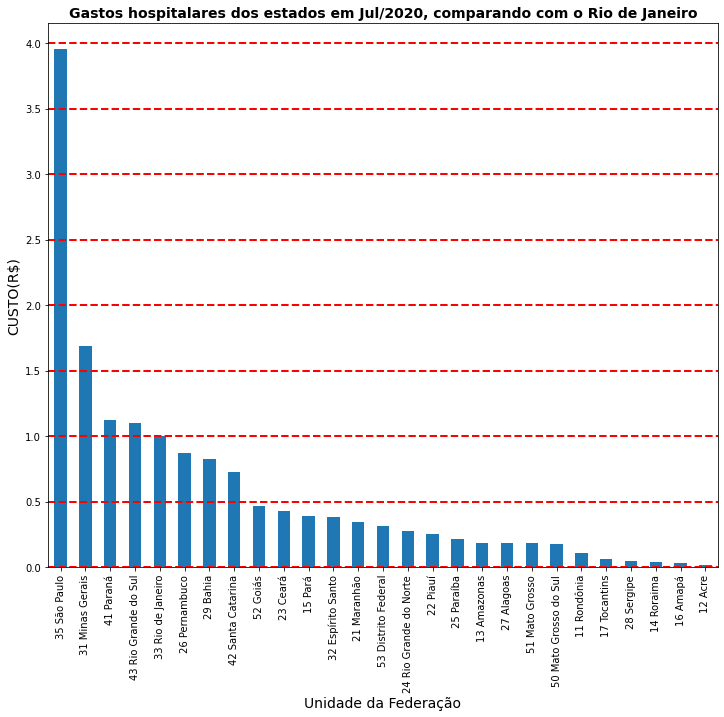

In [ ]:
ax=gastos_do_mes_recente_RJ.plot(kind='bar', figsize=(12,10))

#Criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Gastos hospitalares dos estados em Jul/2020, comparando com o Rio de Janeiro',fontsize = 14, fontweight = 'bold')

#Criando o grid
plt.grid(axis='y',color='r',linestyle='--',linewidth=2,)


plt.show()

## Aula 5 - Desafio 2

O Desafio 2 pede que a análise realizada com o Rio de Janeiro, tome como base o estado da minha escolha, seguirei utilizando o Ceará

**1. Passo**

Calculando a proporção dos gastos

In [ ]:
#Calcualndo os valores dos gastos do mês, comparando com o Ceará
gastos_do_mes_recente_ceara = gastos_do_mes_recente/gastos_do_mes_recente['23 Ceará']

#Ordenando os valores dos gastos do mês, comparando com o Ceará
gastos_do_mes_recente_ceara = gastos_do_mes_recente_ceara.sort_values(ascending=False)
gastos_do_mes_recente_ceara

Unidade da Federação
35 São Paulo             9.18
31 Minas Gerais          3.91
41 Paraná                2.61
43 Rio Grande do Sul     2.56
33 Rio de Janeiro        2.32
26 Pernambuco            2.02
29 Bahia                 1.91
42 Santa Catarina        1.68
52 Goiás                 1.09
23 Ceará                 1.00
15 Pará                  0.90
32 Espírito Santo        0.89
21 Maranhão              0.79
53 Distrito Federal      0.72
24 Rio Grande do Norte   0.64
22 Piauí                 0.58
25 Paraíba               0.50
13 Amazonas              0.43
27 Alagoas               0.42
51 Mato Grosso           0.42
50 Mato Grosso do Sul    0.41
11 Rondônia              0.24
17 Tocantins             0.15
28 Sergipe               0.11
14 Roraima               0.09
16 Amapá                 0.07
12 Acre                  0.04
Name: 2020/Jul, dtype: float64

**2. Passo**

Plotando os gráficos 

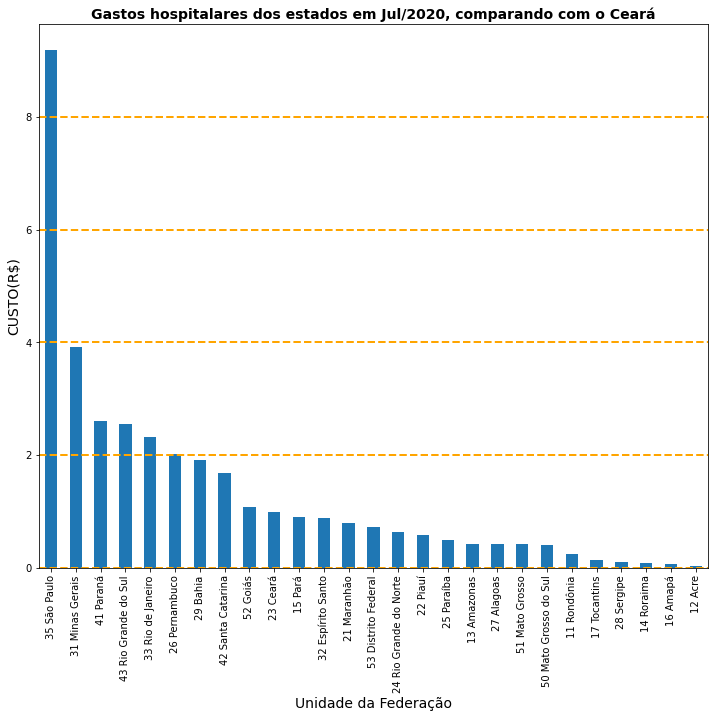

In [ ]:
ax=gastos_do_mes_recente_ceara.plot(kind='bar', figsize=(12,10))

#Criando titulos
plt.ylabel('CUSTO(R$)', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Gastos hospitalares dos estados em Jul/2020, comparando com o Ceará',fontsize = 14, fontweight = 'bold')

#Criando o grid
plt.grid(axis='y',color='orange',linestyle='--',linewidth=2,)


plt.show()

## Aula 5 - Desafio 3

O Desafio 3 pede que seja feito o calculo percapita e que seja analisado o meu estado e mais um a minha escolha, para isso será preciso:

* SOMAR O TOTAL DE ANOS 

* INSERIR O DATASET POP

* FAZER ANALISES

**1. Passo**

CRIAR UMA LISTA COM CADA ANO E DEPOIS ANALISAR O DATASET POR ESSA LISTA

In [ ]:
mes_ano=ordenado_por_total_2.columns.tolist()
len(mes_ano)

150

Existem 150 meses. Sendo que:

* O ano de 2008 tem apenas: 11 meses (ja que foi desconsiderado o mês de janeiro, anteriormente);

* O ano de 2020 desse dataset, vai até o mês de jul/2020 por tanto = 7 meses

* Fazendo um slicer na nossa variavel, retirando o primeiro e o ultimo mês, teremos 132 meses, distribuidos entre 2009 - 2019 (11 meses).

**2. Passo**

Através dos slicers, podemos criar uma váriavel para cada ano e por seguinte, inviesar nosso dataset para criação da nosso coluna com o total de gastos

In [ ]:
ano_2008 = mes_ano[0:11]
ano_2009 = mes_ano[11:23]
ano_2010 = mes_ano[23:35]
ano_2011 = mes_ano[35:47]
ano_2012 = mes_ano[47:59]
ano_2013 = mes_ano[59:71]
ano_2014 = mes_ano[71:83]
ano_2015 = mes_ano[83:95]
ano_2016 = mes_ano[83:107]
ano_2017 = mes_ano[107:119]
ano_2018 = mes_ano[119:131]
ano_2019 = mes_ano[131:143]
ano_2020 =mes_ano[143:150]

In [ ]:
ordenado_por_total_2[ano_2008].sum(axis=1)

Unidade da Federação
35 São Paulo             1960.23
31 Minas Gerais           894.35
41 Paraná                 625.69
43 Rio Grande do Sul      599.63
33 Rio de Janeiro         479.18
29 Bahia                  468.99
26 Pernambuco             333.09
42 Santa Catarina         318.44
23 Ceará                  332.22
52 Goiás                  222.00
15 Pará                   253.27
21 Maranhão               162.82
32 Espírito Santo         133.77
24 Rio Grande do Norte    116.37
25 Paraíba                137.60
53 Distrito Federal       129.63
50 Mato Grosso do Sul     107.54
22 Piauí                  115.58
27 Alagoas                104.20
51 Mato Grosso            101.09
13 Amazonas                91.28
28 Sergipe                 52.82
17 Tocantins               58.65
11 Rondônia                28.01
12 Acre                    22.75
14 Roraima                 11.08
16 Amapá                   16.08
dtype: float64

In [ ]:
ordenado_por_total_2['2008'] = ordenado_por_total_2[ano_2008].sum(axis=1)
ordenado_por_total_2['2009'] = ordenado_por_total_2[ano_2009].sum(axis=1)
ordenado_por_total_2['2010'] = ordenado_por_total_2[ano_2010].sum(axis=1)
ordenado_por_total_2['2011'] = ordenado_por_total_2[ano_2011].sum(axis=1)
ordenado_por_total_2['2012'] = ordenado_por_total_2[ano_2012].sum(axis=1)
ordenado_por_total_2['2013'] = ordenado_por_total_2[ano_2013].sum(axis=1)
ordenado_por_total_2['2014'] = ordenado_por_total_2[ano_2014].sum(axis=1)
ordenado_por_total_2['2015'] = ordenado_por_total_2[ano_2015].sum(axis=1)
ordenado_por_total_2['2016'] = ordenado_por_total_2[ano_2016].sum(axis=1)
ordenado_por_total_2['2017'] = ordenado_por_total_2[ano_2017].sum(axis=1)
ordenado_por_total_2['2018'] = ordenado_por_total_2[ano_2018].sum(axis=1)
ordenado_por_total_2['2019'] = ordenado_por_total_2[ano_2019].sum(axis=1)
ordenado_por_total_2['2020'] = ordenado_por_total_2[ano_2020].sum(axis=1)
ordenado_por_total_2.head()


2008/Fev  2008/Mar  2008/Abr  ...    2018    2019    2020
Unidade da Federação                                ...                        
35 São Paulo            172.83    170.48    170.28  ... 3379.99 3488.39 1986.28
31 Minas Gerais          70.30     79.12     79.05  ... 1797.03 1879.92  966.14
41 Paraná                48.86     55.61     56.12  ... 1464.18 1512.23  728.86
43 Rio Grande do Sul     45.90     52.93     51.97  ... 1083.40 1129.69  597.90
33 Rio de Janeiro        44.12     42.89     45.30  ...  894.31  949.69  529.30

[5 rows x 163 columns]

**3. Passo**

Feito o tratamento do dataframe gastos. Será adicionado aqui o dataset, obtido também pela plataforma TABNET a partir de dados fornecidos pelo IBGE, mas modificada por mim acrescentando os valores que o IBGE ja disponibilizou para o ano de 2020

Irei disponibilizar esse banco de dados no meu GITHUB

In [ ]:
dados_pop=pd.read_csv('/content/drive/MyDrive/BOOTCAMP - ALURA/ARQUIVOS /A203648189_28_143_208_MODIFICADO.csv', sep=';',thousands='.' ,decimal=',',encoding='ISO-8859-1', skipfooter=1)
dados_pop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Unidade da Federação      2008      2009  ...      2018      2019      2020
0              11 Rondônia   1493566   1503928  ...   1757589   1777225   1796460
1                  12 Acre    680073    691132  ...    869265    881935    894470
2              13 Amazonas   3341096   3393369  ...   4080611   4144597   4207714
3               14 Roraima    412783    421499  ...    576568    605761    631181
4                  15 Pará   7321493   7457119  ...   8513497   8602865   8690745
5                 16 Amapá    613164    626609  ...    829494    845731    861773
6             17 Tocantins   1280509   1292051  ...   1555229   1572866   1590248
7              21 Maranhão   6305539   6367138  ...   7035055   7075181   7114598
8                 22 Piauí   3119697   3145325  ...   3264531   3273227   3281480
9                 23 Ceará   8450527   8547809  ...   9075649   9132078   9187103
10  24 Rio Grande do Norte   3106430   3137541  ...   3479010   3506853   3534165
11              25 Paraíba   3742606   3769977  ...   3996496   4018127   4039277
12           26 Pernambuco   8734194   8810256  ...   9496294   9557071   9616621
13              27 Alagoas   3127557   3156108  ...   3322820   3337357   3351543
14              28 Sergipe   1999374   2019679  ...   2278308   2298696   2318822
15                29 Bahia  14502575  14637364  ...  14812617  14873064  14930634
16         31 Minas Gerais  19850072  20033665  ...  21040662  21168791  21292666
17       32 Espírito Santo   3453648   3487199  ...   3972388   4018650   4064052
18       33 Rio de Janeiro  15872362  16010429  ...  17159960  17264943  17366189
19            35 São Paulo  41011635  41384039  ...  45538936  45919049  46289333
20               41 Paraná  10590169  10686247  ...  11348937  11433957  11516840
21       42 Santa Catarina   6052587   6118743  ...   7075494   7164788   7252502
22    43 Rio Grande do Sul  10855214  10914128  ...  11329605  11377239  11422973
23   50 Mato Grosso do Sul   2336058   2360498  ...   2748023   2778986   2809394
24          51 Mato Grosso   2957732   3001692  ...   3441998   3484466   3526220
25                52 Goiás   5844996   5926300  ...   6921161   7018354   7113540
26     53 Distrito Federal   2557158   2606885  ...   2974703   3015268   3055149

[27 rows x 14 columns]

In [ ]:
dados_pop = dados_pop.set_index('Unidade da Federação')

In [ ]:
dados_pop['Total']=dados_pop.sum(axis=1)
dados_pop.head()

2008     2009     2010  ...     2019     2020      Total
Unidade da Federação                             ...                             
11 Rondônia           1493566  1503928  1560501  ...  1777225  1796460   21893751
12 Acre                680073   691132   732793  ...   881935   894470   10271223
13 Amazonas           3341096  3393369  3480937  ...  4144597  4207714   49462977
14 Roraima             412783   421499   451227  ...   605761   631181    6556246
15 Pará               7321493  7457119  7588078  ...  8602865  8690745  104668114

[5 rows x 14 columns]

In [ ]:
dados_pop.sort_values('Total',ascending=False)
dados_pop = dados_pop/1000000
dados_pop

2008  2009  2010  2011  ...  2018  2019  2020  Total
Unidade da Federação                            ...                         
11 Rondônia             1.49  1.50  1.56  1.58  ...  1.76  1.78  1.80  21.89
12 Acre                 0.68  0.69  0.73  0.75  ...  0.87  0.88  0.89  10.27
13 Amazonas             3.34  3.39  3.48  3.54  ...  4.08  4.14  4.21  49.46
14 Roraima              0.41  0.42  0.45  0.46  ...  0.58  0.61  0.63   6.56
15 Pará                 7.32  7.46  7.59  7.69  ...  8.51  8.60  8.69 104.67
16 Amapá                0.61  0.63  0.67  0.68  ...  0.83  0.85  0.86   9.66
17 Tocantins            1.28  1.29  1.38  1.40  ...  1.56  1.57  1.59  19.07
21 Maranhão             6.31  6.37  6.57  6.65  ...  7.04  7.08  7.11  88.33
22 Piauí                3.12  3.15  3.12  3.14  ...  3.26  3.27  3.28  41.52
23 Ceará                8.45  8.55  8.45  8.53  ...  9.08  9.13  9.19 114.49
24 Rio Grande do Norte  3.11  3.14  3.17  3.20  ...  3.48  3.51  3.53  43.57
25 Paraíba              3.74  3.77  3.77  3.79  ...  4.00  4.02  4.04  50.80
26 Pernambuco           8.73  8.81  8.80  8.86  ...  9.50  9.56  9.62 119.52
27 Alagoas              3.13  3.16  3.12  3.14  ...  3.32  3.34  3.35  42.42
28 Sergipe              2.00  2.02  2.07  2.09  ...  2.28  2.30  2.32  28.40
29 Bahia               14.50 14.64 14.02 14.10  ... 14.81 14.87 14.93 192.05
31 Minas Gerais        19.85 20.03 19.60 19.73  ... 21.04 21.17 21.29 266.88
32 Espírito Santo       3.45  3.49  3.51  3.55  ...  3.97  4.02  4.06  49.28
33 Rio de Janeiro      15.87 16.01 15.99 16.11  ... 17.16 17.26 17.37 214.75
35 São Paulo           41.01 41.38 41.25 41.59  ... 45.54 45.92 46.29 566.82
41 Paraná              10.59 10.69 10.44 10.51  ... 11.35 11.43 11.52 142.91
42 Santa Catarina       6.05  6.12  6.25  6.32  ...  7.08  7.16  7.25  86.71
43 Rio Grande do Sul   10.86 10.91 10.70 10.73  ... 11.33 11.38 11.42 144.33
50 Mato Grosso do Sul   2.34  2.36  2.45  2.48  ...  2.75  2.78  2.81  33.72
51 Mato Grosso          2.96  3.00  3.03  3.08  ...  3.44  3.48  3.53  41.96
52 Goiás                5.84  5.93  6.00  6.08  ...  6.92  7.02  7.11  84.11
53 Distrito Federal     2.56  2.61  2.56  2.61  ...  2.97  3.02  3.06  36.60

[27 rows x 14 columns]

In [ ]:
dados_pop=dados_pop.sort_values('Total',ascending=False)
dados_pop=dados_pop.drop('Total',axis=1)


In [ ]:
dados_pop=dados_pop.astype(float)
dados_pop.head()

2008  2009  2010  2011  ...  2017  2018  2019  2020
Unidade da Federação                          ...                        
35 São Paulo         41.01 41.38 41.25 41.59  ... 45.09 45.54 45.92 46.29
31 Minas Gerais      19.85 20.03 19.60 19.73  ... 21.12 21.04 21.17 21.29
33 Rio de Janeiro    15.87 16.01 15.99 16.11  ... 16.72 17.16 17.26 17.37
29 Bahia             14.50 14.64 14.02 14.10  ... 15.34 14.81 14.87 14.93
43 Rio Grande do Sul 10.86 10.91 10.70 10.73  ... 11.32 11.33 11.38 11.42

[5 rows x 13 columns]

In [ ]:
mes_total = ordenado_por_total_2.columns[150:163].tolist()
gasto_total = ordenado_por_total_2[mes_total]
gasto_total

2008    2009    2010  ...    2018    2019    2020
Unidade da Federação                            ...                        
35 São Paulo           1960.23 2489.03 2696.62  ... 3379.99 3488.39 1986.28
31 Minas Gerais         894.35 1149.14 1217.49  ... 1797.03 1879.92  966.14
41 Paraná               625.69  794.21  867.92  ... 1464.18 1512.23  728.86
43 Rio Grande do Sul    599.63  762.24  795.98  ... 1083.40 1129.69  597.90
33 Rio de Janeiro       479.18  607.52  659.78  ...  894.31  949.69  529.30
29 Bahia                468.99  587.24  610.27  ...  848.41  882.86  457.34
26 Pernambuco           333.09  443.70  499.93  ...  797.45  819.32  441.55
42 Santa Catarina       318.44  418.25  447.62  ...  712.13  756.52  397.10
23 Ceará                332.22  400.77  409.30  ...  580.53  617.43  319.12
52 Goiás                222.00  281.86  303.47  ...  412.48  431.02  232.33
15 Pará                 253.27  318.53  323.48  ...  412.28  407.97  239.37
21 Maranhão             162.82  215.44  236.51  ...  353.92  365.88  200.97
32 Espírito Santo       133.77  172.14  187.92  ...  302.37  323.65  187.89
24 Rio Grande do Norte  116.37  148.43  160.99  ...  248.10  263.55  140.70
25 Paraíba              137.60  185.15  188.78  ...  222.31  230.83  122.90
53 Distrito Federal     129.63  166.03  168.07  ...  228.59  242.81  143.33
50 Mato Grosso do Sul   107.54  135.06  145.84  ...  201.92  217.55  114.48
22 Piauí                115.58  149.08  146.39  ...  192.15  208.10  108.34
27 Alagoas              104.20  134.99  143.98  ...  202.49  206.83  105.35
51 Mato Grosso          101.09  134.69  143.30  ...  190.54  189.01   97.91
13 Amazonas              91.28  106.49  114.18  ...  178.71  188.23  112.49
28 Sergipe               52.82   69.22   79.66  ...  109.40  118.50   54.82
17 Tocantins             58.65   76.68   79.70  ...   67.23   84.29   44.04
11 Rondônia              28.01   44.13   53.12  ...  102.99  106.16   56.52
12 Acre                  22.75   26.01   29.42  ...   35.00   35.58   17.32
14 Roraima               11.08   16.93   21.02  ...   33.43   34.58   20.04
16 Amapá                 16.08   21.44   20.79  ...   25.95   29.03   16.31

[27 rows x 13 columns]

**4. Passo**

Calculo dos dados per capita

In [ ]:
dados_per_capita = gasto_total/dados_pop
dados_per_capita

2008  2009  2010  2011  ...   2017   2018   2019  2020
Unidade da Federação                            ...                           
11 Rondônia            18.75 29.35 34.04 34.10  ...  53.44  58.60  59.73 31.46
12 Acre                33.45 37.64 40.15 44.67  ...  46.38  40.27  40.34 19.36
13 Amazonas            27.32 31.38 32.80 33.99  ...  39.84  43.79  45.41 26.73
14 Roraima             26.84 40.17 46.58 41.65  ...  60.17  57.98  57.08 31.75
15 Pará                34.59 42.72 42.63 42.29  ...  46.40  48.43  47.42 27.54
16 Amapá               26.23 34.21 31.09 31.72  ...  28.31  31.28  34.32 18.92
17 Tocantins           45.80 59.35 57.61 60.72  ...  47.03  43.23  53.59 27.69
21 Maranhão            25.82 33.84 36.00 36.85  ...  47.24  50.31  51.71 28.25
22 Piauí               37.05 47.40 46.94 47.81  ...  58.42  58.86  63.58 33.02
23 Ceará               39.31 46.89 48.45 50.22  ...  61.46  63.97  67.61 34.74
24 Rio Grande do Norte 37.46 47.31 50.82 53.52  ...  63.45  71.31  75.15 39.81
25 Paraíba             36.77 49.11 50.12 48.01  ...  52.13  55.63  57.45 30.43
26 Pernambuco          38.14 50.36 56.84 56.65  ...  82.37  83.97  85.73 45.92
27 Alagoas             33.32 42.77 46.13 47.35  ...  56.14  60.94  61.97 31.43
28 Sergipe             26.42 34.27 38.52 38.52  ...  44.15  48.02  51.55 23.64
29 Bahia               32.34 40.12 43.52 46.71  ...  54.03  57.28  59.36 30.63
31 Minas Gerais        45.06 57.36 62.13 66.66  ...  81.81  85.41  88.81 45.37
32 Espírito Santo      38.73 49.36 53.50 58.08  ...  76.19  76.12  80.54 46.23
33 Rio de Janeiro      30.19 37.95 41.25 42.02  ...  49.91  52.12  55.01 30.48
35 São Paulo           47.80 60.14 65.37 67.20  ...  73.23  74.22  75.97 42.91
41 Paraná              59.08 74.32 83.14 86.49  ... 118.78 129.02 132.26 63.29
42 Santa Catarina      52.61 68.36 71.62 76.17  ...  96.13 100.65 105.59 54.75
43 Rio Grande do Sul   55.24 69.84 74.42 76.72  ...  93.89  95.63  99.29 52.34
50 Mato Grosso do Sul  46.04 57.22 59.54 60.84  ...  72.11  73.48  78.28 40.75
51 Mato Grosso         34.18 44.87 47.23 46.43  ...  56.16  55.36  54.24 27.77
52 Goiás               37.98 47.56 50.54 53.51  ...  60.61  59.60  61.41 32.66
53 Distrito Federal    50.69 63.69 65.58 67.72  ...  68.80  76.84  80.53 46.91

[27 rows x 13 columns]

Adicionando a coluna Regiões ao dataframe

In [ ]:
regioes = []

#Criando as condições
for estado in dados_per_capita.T.columns.tolist():
  if estado[0] == '1':
    regioes.append('Norte')
  elif estado[0] == '2':
    regioes.append('Nordeste')
  elif estado[0] == '3':
    regioes.append('Sudeste')
  elif estado[0] == '4':
    regioes.append('Sul')
  elif estado[0] == '5':
    regioes.append('Centro-Oeste')

#Criando a coluna

dados_per_capita['Região'] = regioes


dados_per_capita.head()

2008  2009  2010  2011  ...  2018  2019  2020  Região
Unidade da Federação                          ...                          
11 Rondônia          18.75 29.35 34.04 34.10  ... 58.60 59.73 31.46   Norte
12 Acre              33.45 37.64 40.15 44.67  ... 40.27 40.34 19.36   Norte
13 Amazonas          27.32 31.38 32.80 33.99  ... 43.79 45.41 26.73   Norte
14 Roraima           26.84 40.17 46.58 41.65  ... 57.98 57.08 31.75   Norte
15 Pará              34.59 42.72 42.63 42.29  ... 48.43 47.42 27.54   Norte

[5 rows x 14 columns]

**5. Passo**


Selecionando os estados utilizados, Ceará e Maranhão e plotando os gráficos

In [ ]:
dados_per_capita_NE = dados_per_capita.query('Região == "Nordeste"')
dados_per_capita_NE=dados_per_capita_NE.drop('Região',axis=1)
CE_MA=dados_per_capita_NE.loc[['21 Maranhão','23 Ceará']]
CE_MA

2008  2009  2010  2011  ...  2017  2018  2019  2020
Unidade da Federação                          ...                        
21 Maranhão          25.82 33.84 36.00 36.85  ... 47.24 50.31 51.71 28.25
23 Ceará             39.31 46.89 48.45 50.22  ... 61.46 63.97 67.61 34.74

[2 rows x 13 columns]

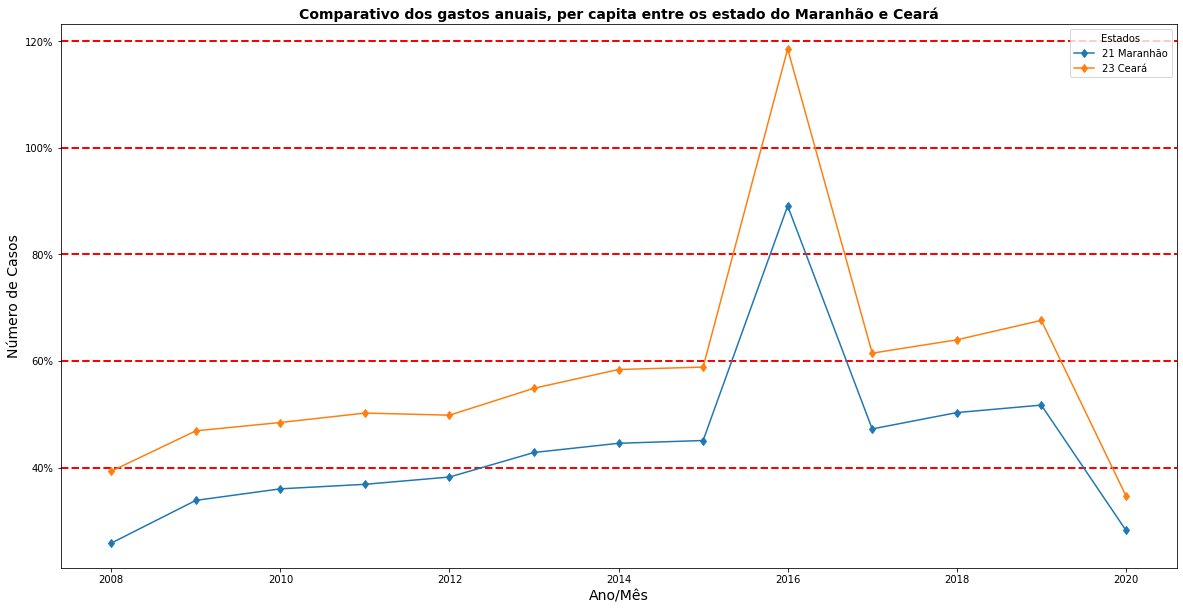

In [ ]:

ax=CE_MA[CE_MA.columns[0:13]].T.plot(kind='line',marker='d',figsize=(20,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))

#criando titulos
plt.ylabel('Número de Casos', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=14)
plt.title('Comparativo dos gastos anuais, per capita entre os estado do Maranhão e Ceará', fontsize = 14, fontweight = 'bold')

#legenda
plt.legend(loc = 'best', title = 'Estados', fontsize=10)

#Criando o grid
plt.grid(axis='y',color='red',linestyle='--',linewidth=2,)

#mostrando o gráfico 
plt.show()

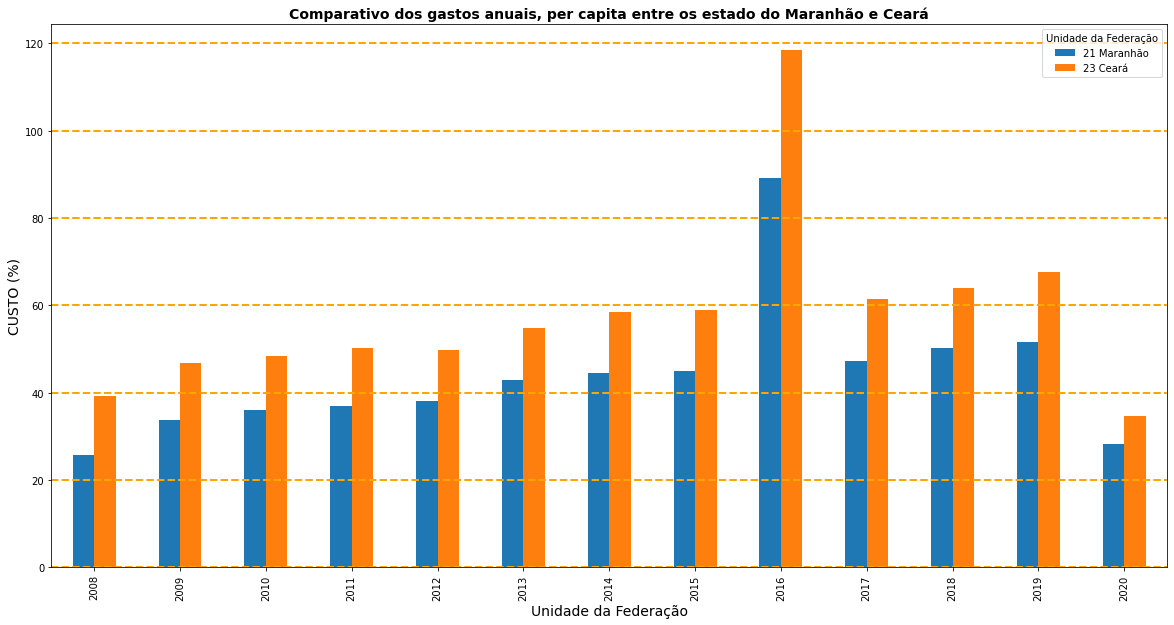

In [ ]:
ax=CE_MA.T.plot(kind='bar', figsize=(20,10))

#Criando titulos
plt.ylabel('CUSTO (%)', fontsize=14)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.title('Comparativo dos gastos anuais, per capita entre os estado do Maranhão e Ceará',fontsize = 14, fontweight = 'bold')

#Criando o grid
plt.grid(axis='y',color='orange',linestyle='--',linewidth=2,)


plt.show()

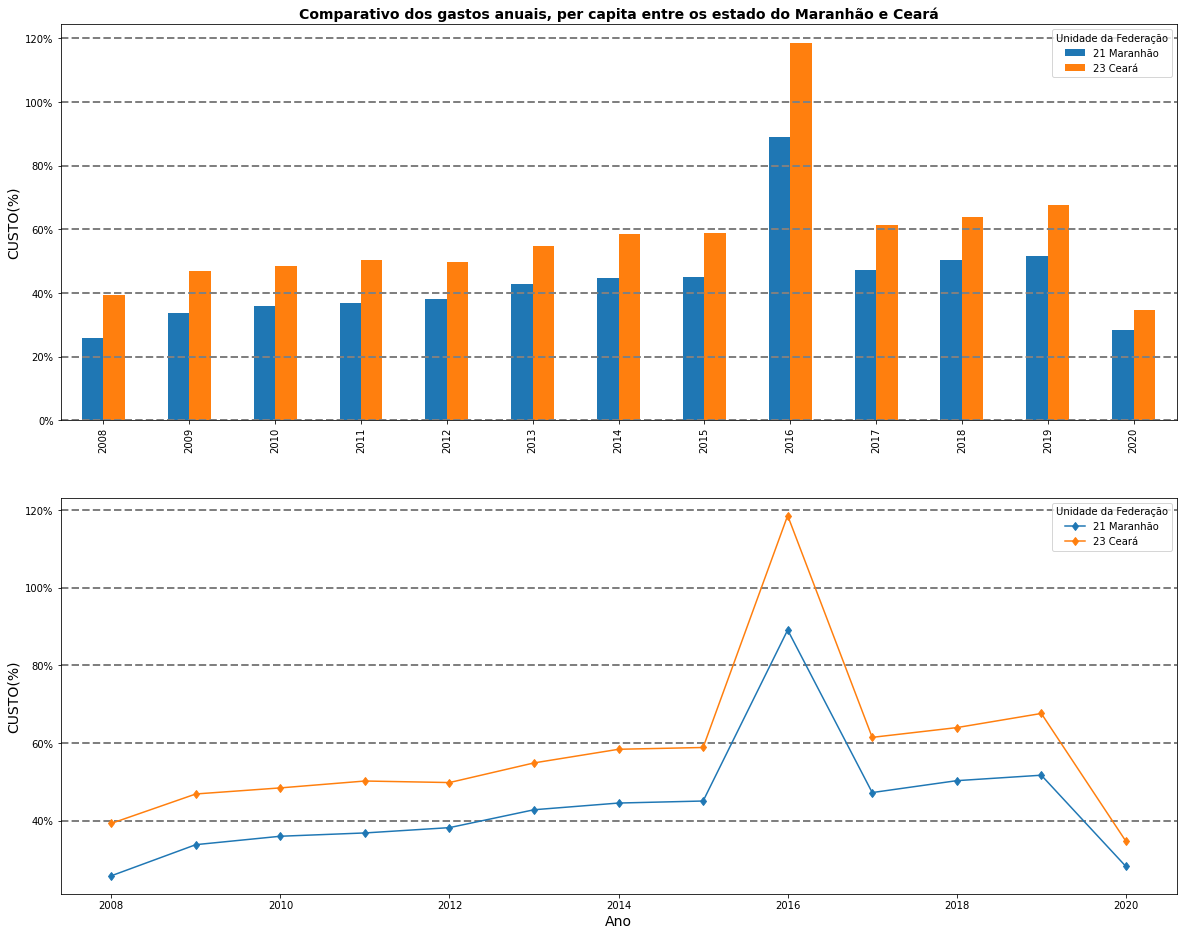

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,16))

#Subplot 1 
CE_MA.T.plot(kind='bar', ax=ax1)
#Subplot 2
CE_MA[CE_MA.columns[0:13]].T.plot(kind='line',marker='d', ax=ax2)

#Configurações subplot 1
ax1.set_ylabel('CUSTO(%)', fontsize=14)
ax1.set_title('Comparativo dos gastos anuais, per capita entre os estado do Maranhão e Ceará',fontsize = 14, fontweight = 'bold')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=2,)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))

#Configurações subplot2
ax2.set_ylabel('CUSTO(%)', fontsize=14)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
ax2.set_xlabel('Ano', fontsize=14)
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=2,)
plt.subplots_adjust(hspace=0.195)
plt.show()

**Considerações**

Os gráficos acima demonstram, que ao longo dos anos ocorreu um crescimento do aumento dos gastos hopitalares.O Maranhão demonstra uma superioridade de 20% a mais que em relação ao Ceará. 


O ponto que mais chama atenção em ambos os gráficos, é que em 2016 existiu um grande crescimento em ambos estados. O que pode estar relacionado com o surto de Zika Virus que acometeu o Brasil em 2016, sobretudo pacientes que eram gestantes.

## Aula 5 - Desafio 4 

O Desafio 4 pede que seja feita uma nova analise e eu resolvi, continuar a analisa per capita, mas dessa vez numa visão macro entre cada região

**Analisando esses dados percapita, mas agora considerando as regiões**


**1.   Passo**

Colcoar a coluna `Região` como index do dataframe. Nesse ponto aproveitei para criar um novo dataframe contendo os dados percapitas por Região




In [ ]:
dados_per_capita_Reg=dados_per_capita.set_index('Região')
dados_per_capita_Reg

2008  2009  2010  2011  2012  ...   2016   2017   2018   2019  2020
Região                                      ...                                  
Norte        18.75 29.35 34.04 34.10 32.89  ... 100.74  53.44  58.60  59.73 31.46
Norte        33.45 37.64 40.15 44.67 44.97  ...  93.20  46.38  40.27  40.34 19.36
Norte        27.32 31.38 32.80 33.99 34.23  ...  75.11  39.84  43.79  45.41 26.73
Norte        26.84 40.17 46.58 41.65 42.88  ...  99.93  60.17  57.98  57.08 31.75
Norte        34.59 42.72 42.63 42.29 40.15  ...  85.92  46.40  48.43  47.42 27.54
Norte        26.23 34.21 31.09 31.72 33.14  ...  56.18  28.31  31.28  34.32 18.92
Norte        45.80 59.35 57.61 60.72 61.76  ... 100.42  47.03  43.23  53.59 27.69
Nordeste     25.82 33.84 36.00 36.85 38.22  ...  89.09  47.24  50.31  51.71 28.25
Nordeste     37.05 47.40 46.94 47.81 48.08  ... 111.37  58.42  58.86  63.58 33.02
Nordeste     39.31 46.89 48.45 50.22 49.82  ... 118.55  61.46  63.97  67.61 34.74
Nordeste     37.46 47.31 50.82 53.52 53.68  ... 120.97  63.45  71.31  75.15 39.81
Nordeste     36.77 49.11 50.12 48.01 47.73  ...  95.77  52.13  55.63  57.45 30.43
Nordeste     38.14 50.36 56.84 56.65 60.33  ... 152.69  82.37  83.97  85.73 45.92
Nordeste     33.32 42.77 46.13 47.35 46.79  ... 104.18  56.14  60.94  61.97 31.43
Nordeste     26.42 34.27 38.52 38.52 39.38  ...  87.98  44.15  48.02  51.55 23.64
Nordeste     32.34 40.12 43.52 46.71 47.89  ... 103.96  54.03  57.28  59.36 30.63
Sudeste      45.06 57.36 62.13 66.66 70.93  ... 157.20  81.81  85.41  88.81 45.37
Sudeste      38.73 49.36 53.50 58.08 61.61  ... 143.58  76.19  76.12  80.54 46.23
Sudeste      30.19 37.95 41.25 42.02 41.25  ...  95.14  49.91  52.12  55.01 30.48
Sudeste      47.80 60.14 65.37 67.20 68.59  ... 142.76  73.23  74.22  75.97 42.91
Sul          59.08 74.32 83.14 86.49 89.89  ... 208.85 118.78 129.02 132.26 63.29
Sul          52.61 68.36 71.62 76.17 80.32  ... 190.14  96.13 100.65 105.59 54.75
Sul          55.24 69.84 74.42 76.72 80.66  ... 185.57  93.89  95.63  99.29 52.34
Centro-Oeste 46.04 57.22 59.54 60.84 63.93  ... 139.75  72.11  73.48  78.28 40.75
Centro-Oeste 34.18 44.87 47.23 46.43 48.05  ... 107.22  56.16  55.36  54.24 27.77
Centro-Oeste 37.98 47.56 50.54 53.51 54.33  ... 122.63  60.61  59.60  61.41 32.66
Centro-Oeste 50.69 63.69 65.58 67.72 67.76  ... 126.28  68.80  76.84  80.53 46.91

[27 rows x 13 columns]

**2. Passo**

Através do método `groupby`, é possivel agrupar todos os dados  que contenham o mesmo nome de uma região e através do método `sum()`, os valores serão agrupados com o somatório em cada ano

In [ ]:
dados_per_capita_Reg2 = dados_per_capita_Reg.groupby(['Região']).sum()
dados_per_capita_Reg2

2008   2009   2010   2011  ...   2017   2018   2019   2020
Região                                    ...                            
Centro-Oeste 168.89 213.34 222.89 228.50  ... 257.68 265.28 274.47 148.09
Nordeste     306.62 392.07 417.33 425.64  ... 519.39 550.28 574.12 297.86
Norte        212.98 274.81 284.91 289.15  ... 321.57 323.57 337.90 183.47
Sudeste      161.77 204.81 222.25 233.95  ... 281.14 287.86 300.32 165.00
Sul          166.93 212.52 229.18 239.38  ... 308.80 325.29 337.14 170.38

[5 rows x 13 columns]

**3. Passo**

Agora será ordenado o dataframe pelos valores totais, criando uma coluna `Total`
e ordenando o dataframe por essa coluna (logo após essa coluna deverá ser dropada)



In [ ]:
dados_per_capita_Reg2.sum(axis=1)

Região
Centro-Oeste   3241.33
Nordeste       6332.55
Norte          4030.41
Sudeste        3421.24
Sul            3659.79
dtype: float64

In [ ]:
dados_per_capita_Reg2['Total'] = dados_per_capita_Reg2.sum(axis=1)
dados_per_capita_Reg2 = dados_per_capita_Reg2.sort_values('Total', ascending=False)
dados_per_capita_Reg2

2008   2009   2010   2011  ...   2018   2019   2020   Total
Região                                    ...                             
Nordeste     306.62 392.07 417.33 425.64  ... 550.28 574.12 297.86 6332.55
Norte        212.98 274.81 284.91 289.15  ... 323.57 337.90 183.47 4030.41
Sul          166.93 212.52 229.18 239.38  ... 325.29 337.14 170.38 3659.79
Sudeste      161.77 204.81 222.25 233.95  ... 287.86 300.32 165.00 3421.24
Centro-Oeste 168.89 213.34 222.89 228.50  ... 265.28 274.47 148.09 3241.33

[5 rows x 14 columns]

In [ ]:
dados_per_capita_Reg2.drop('Total',axis=1,inplace=True)
dados_per_capita_Reg2

2008   2009   2010   2011  ...   2017   2018   2019   2020
Região                                    ...                            
Nordeste     306.62 392.07 417.33 425.64  ... 519.39 550.28 574.12 297.86
Norte        212.98 274.81 284.91 289.15  ... 321.57 323.57 337.90 183.47
Sul          166.93 212.52 229.18 239.38  ... 308.80 325.29 337.14 170.38
Sudeste      161.77 204.81 222.25 233.95  ... 281.14 287.86 300.32 165.00
Centro-Oeste 168.89 213.34 222.89 228.50  ... 257.68 265.28 274.47 148.09

[5 rows x 13 columns]

**3. Passo**

plotando o gráfico


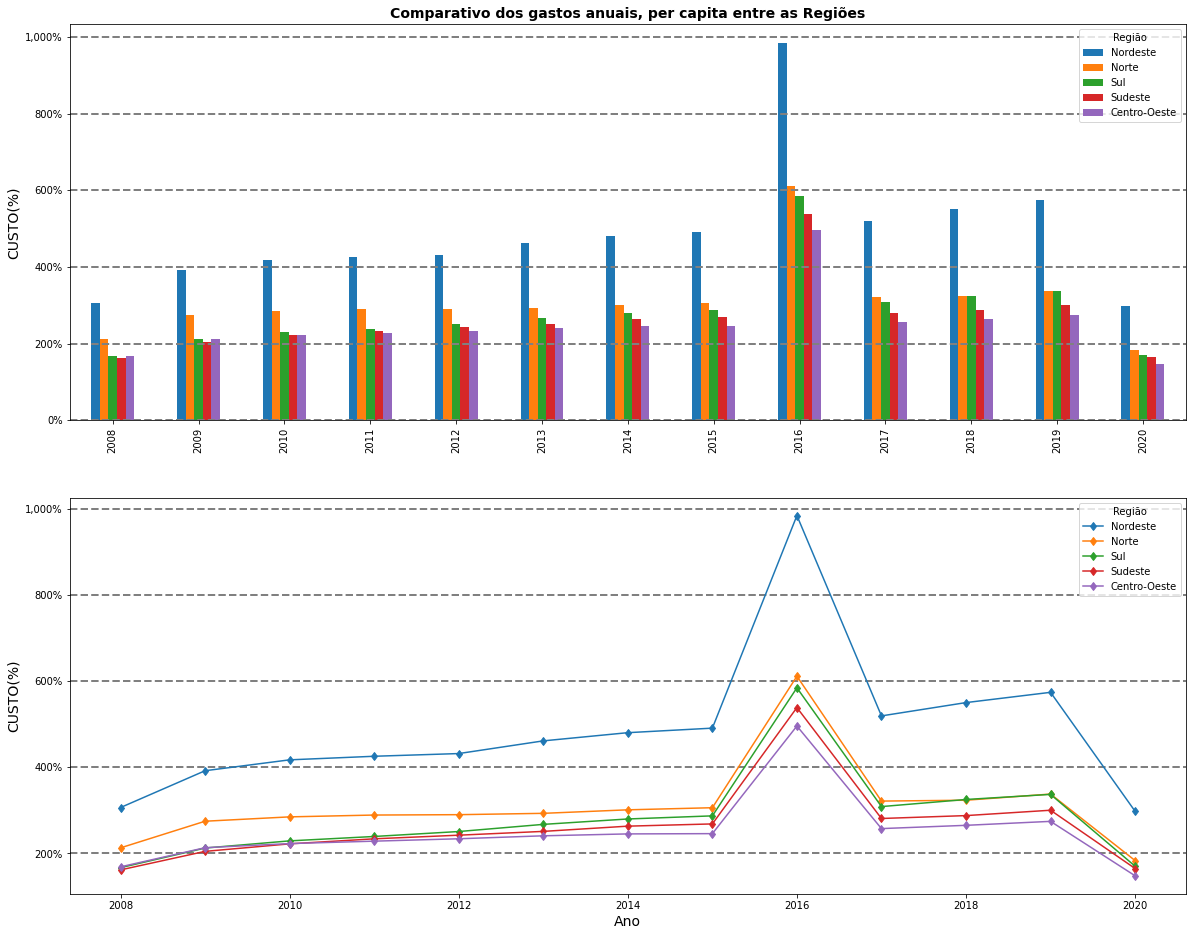

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,16))

#Subplot 1 
dados_per_capita_Reg2.T.plot(kind='bar', ax=ax1)
#Subplot 2
dados_per_capita_Reg2.T.plot(kind='line',marker='d', ax=ax2)

#Configurações subplot 1
ax1.set_ylabel('CUSTO(%)', fontsize=14)
ax1.set_title('Comparativo dos gastos anuais, per capita entre as Regiões',fontsize = 14, fontweight = 'bold')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=2,)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))

#Configurações subplot2
ax2.set_ylabel('CUSTO(%)', fontsize=14)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
ax2.set_xlabel('Ano', fontsize=14)
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=2,)
plt.subplots_adjust(hspace=0.195)
plt.show()

Analisando os gráficos conseguimos perceber uma predominância da região Nordeste e que em 2016 todas as regiões tiveram um crescimento considerável em relação gastos, o que de novo pode estar relacionado ao surto de Zika Virus no Brasil